In [1]:
import pandas as pd


In [44]:
dfs1 = [pd.read_csv(f"../../outputs/results/230721finding_type_validation_loo_seed{123+seed}_epoch5.csv") for seed in range(5)]
dfs = [pd.read_csv(f"../../outputs/results/230308finding_type_validation_loo_seed{123+seed}_epoch5.csv") for seed in range(5)]

In [35]:
for i in range(5):
    dfs[i]["AP"] = dfs1[i]["AP"]

In [36]:
dfs[0].columns

Index(['model', 'layer', 'pathological findings', 'AUROC', 'MCC',
       'Balanced Accuracy', 'AP'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


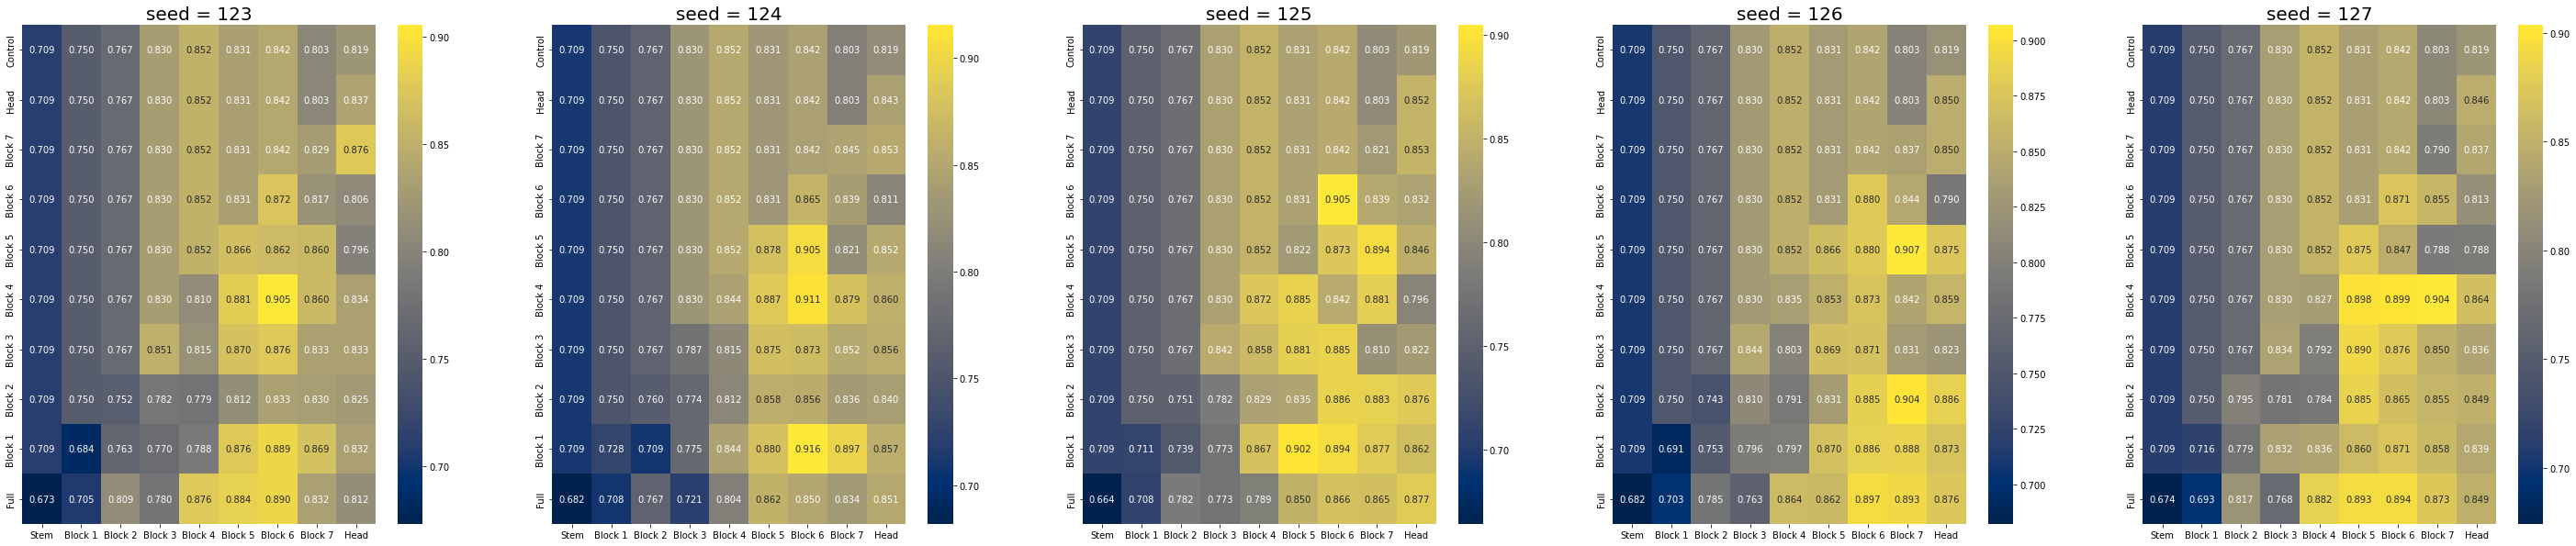

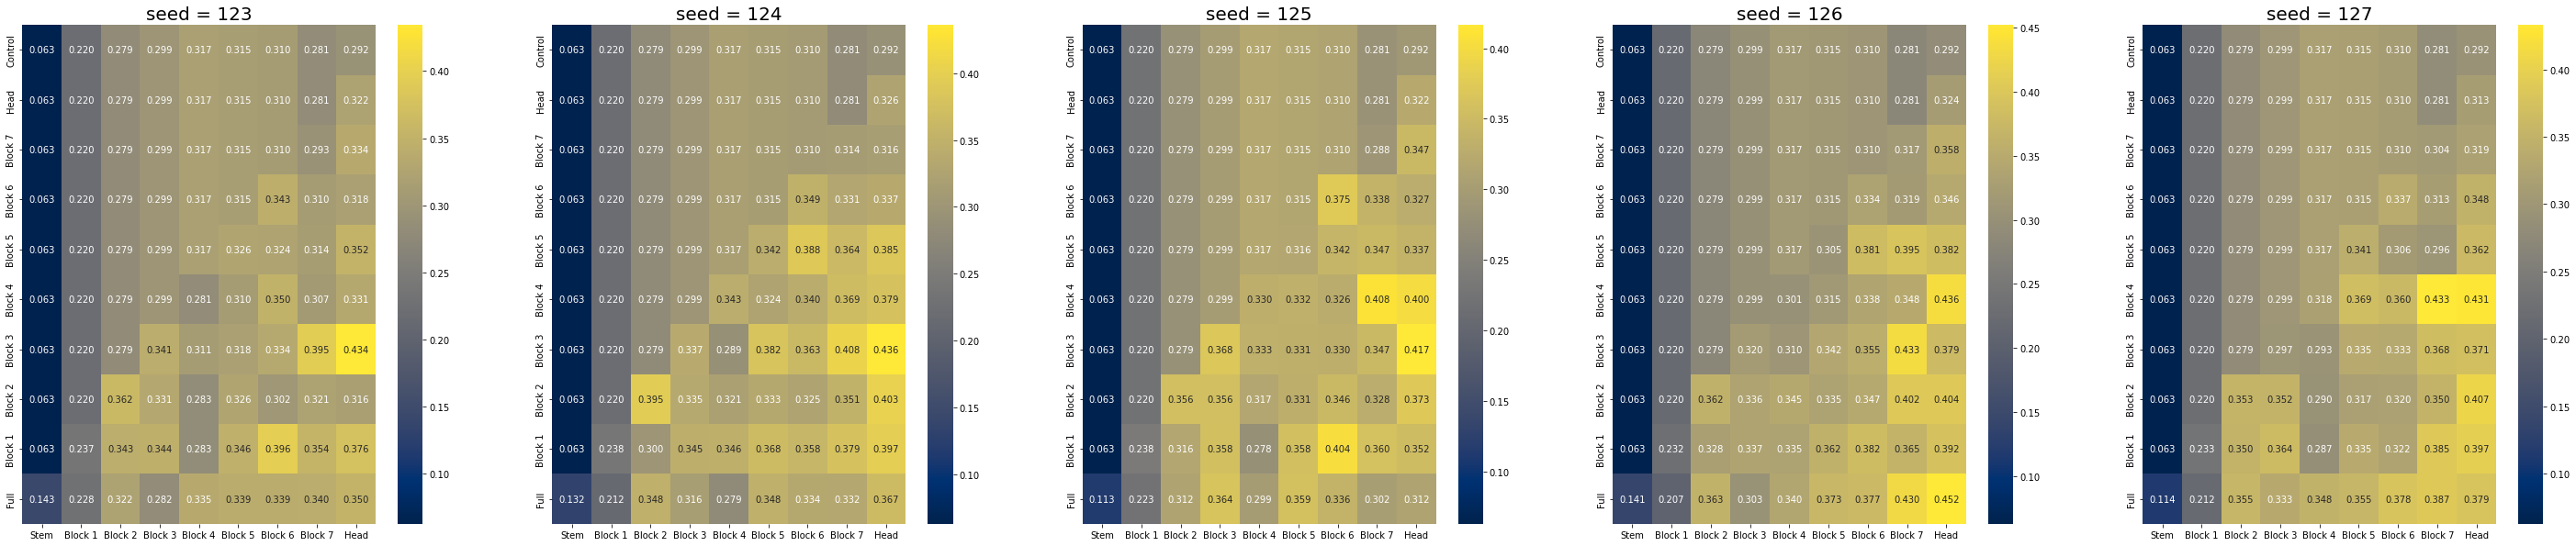

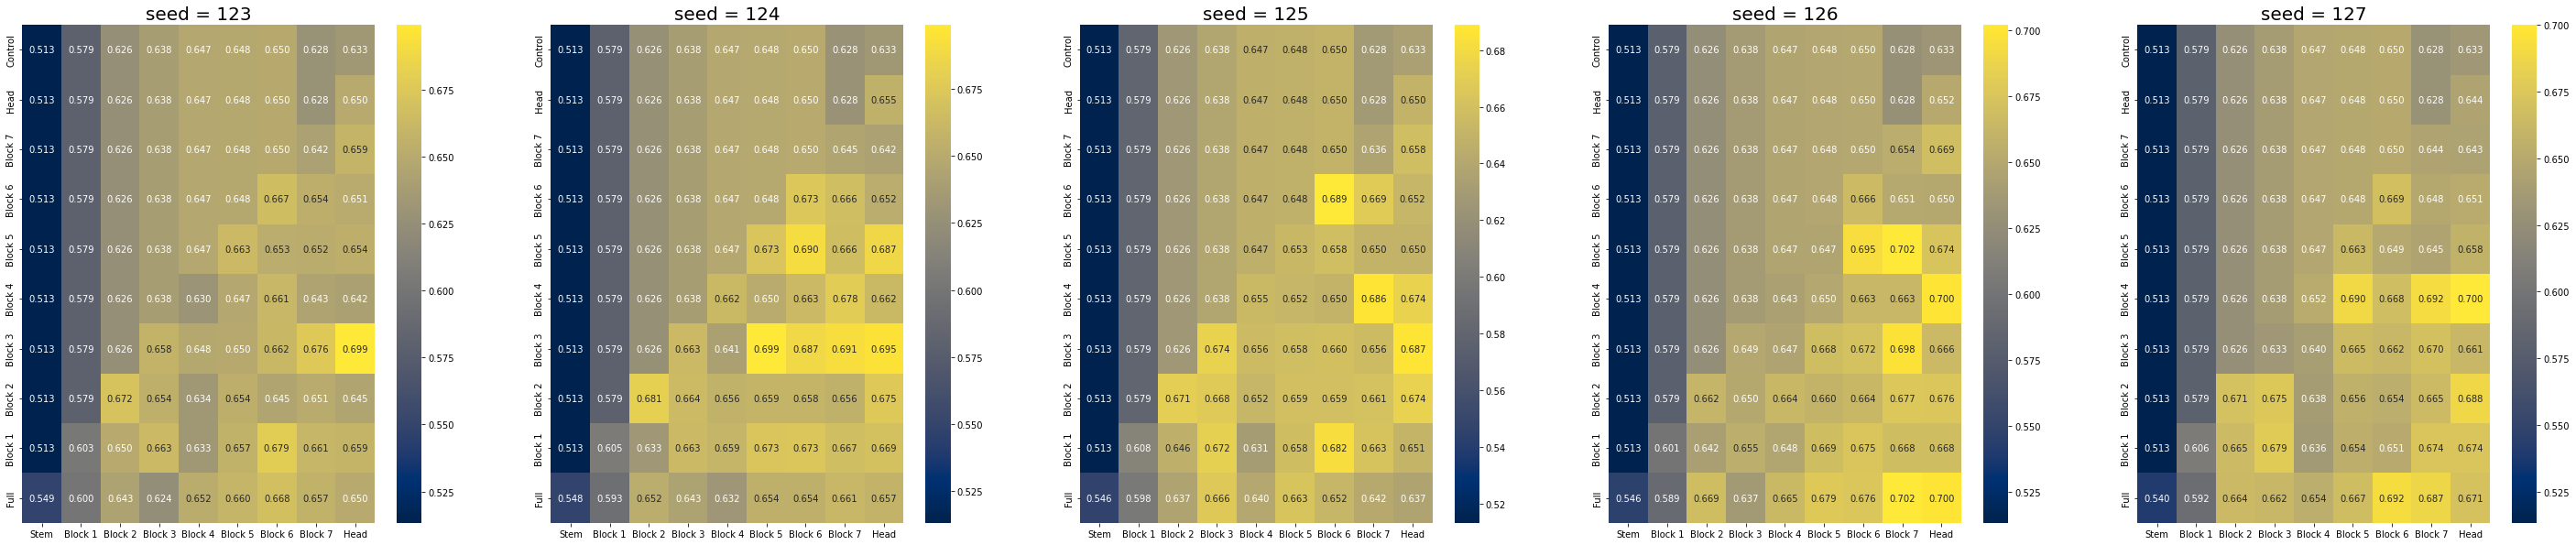

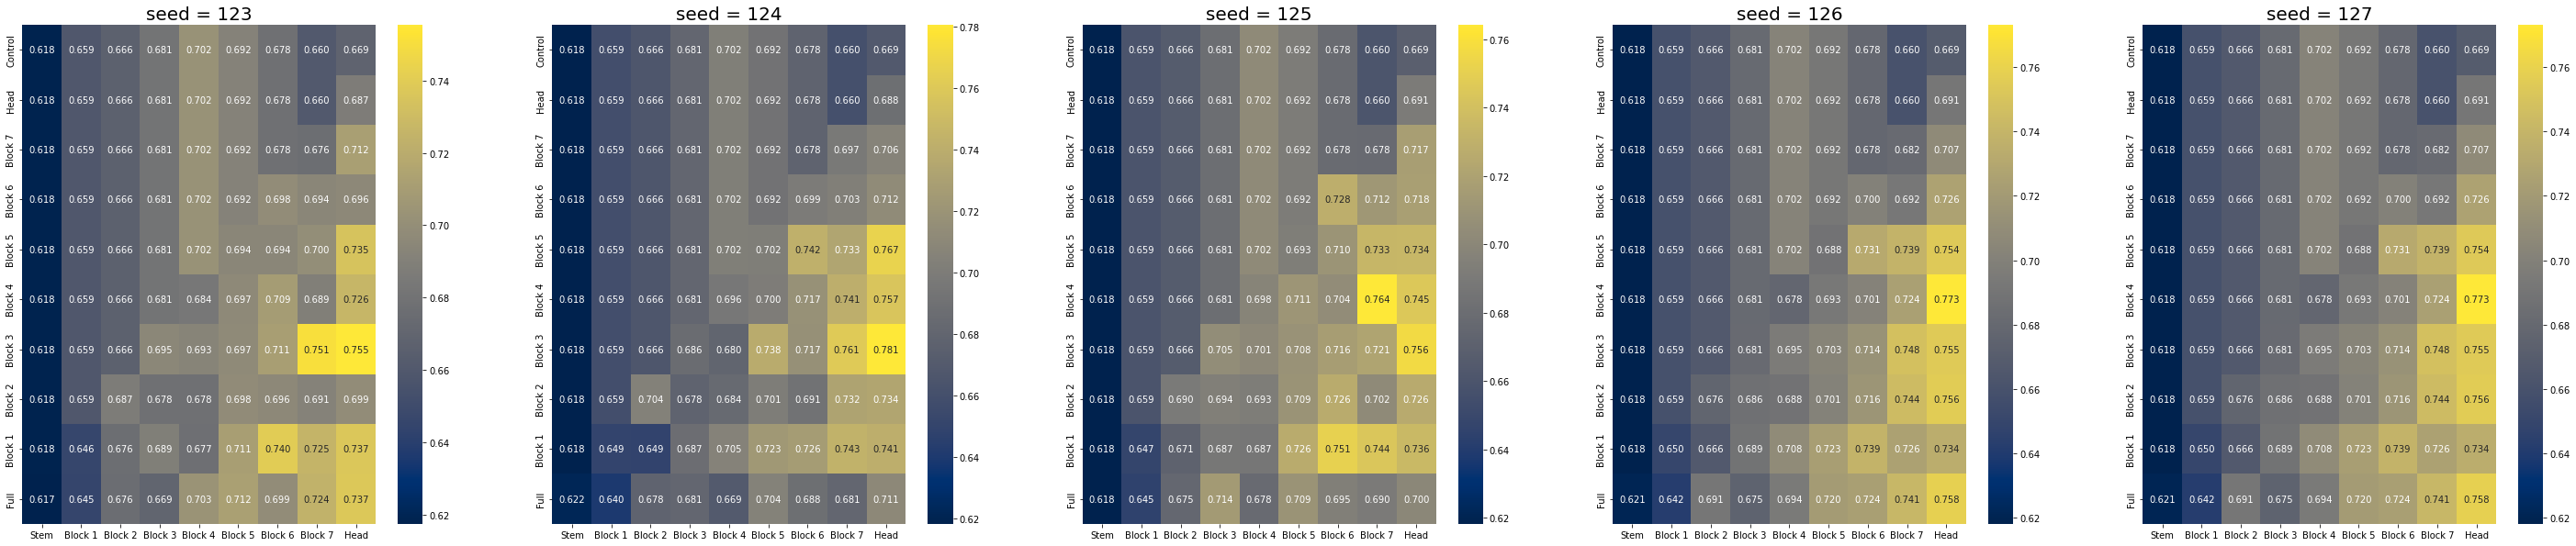

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

model_name = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]
layer_name = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]

import numpy as np


for i, mtx in enumerate(['AUROC', 'MCC',
       'Balanced Accuracy', 'AP']):
    fig = plt.figure(figsize=(50, 10))
    for seed in range(5):
        ax = fig.add_subplot(1, 5, seed + 1)
        ax.set_title(f"seed = {seed + 123}", fontdict={"fontsize":20})

        rec = [[0 for i in layer_name] for j in model_name]
        for i, m in enumerate(model_name):
            for j, l in enumerate(layer_name):
                x = dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx]
                rec[i][j] = x
        df = pd.DataFrame(rec)
        df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
        df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

        sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
    plt.savefig(f"../../outputs/230607_loo_mean_res_{mtx}.png", dpi=300)
    plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


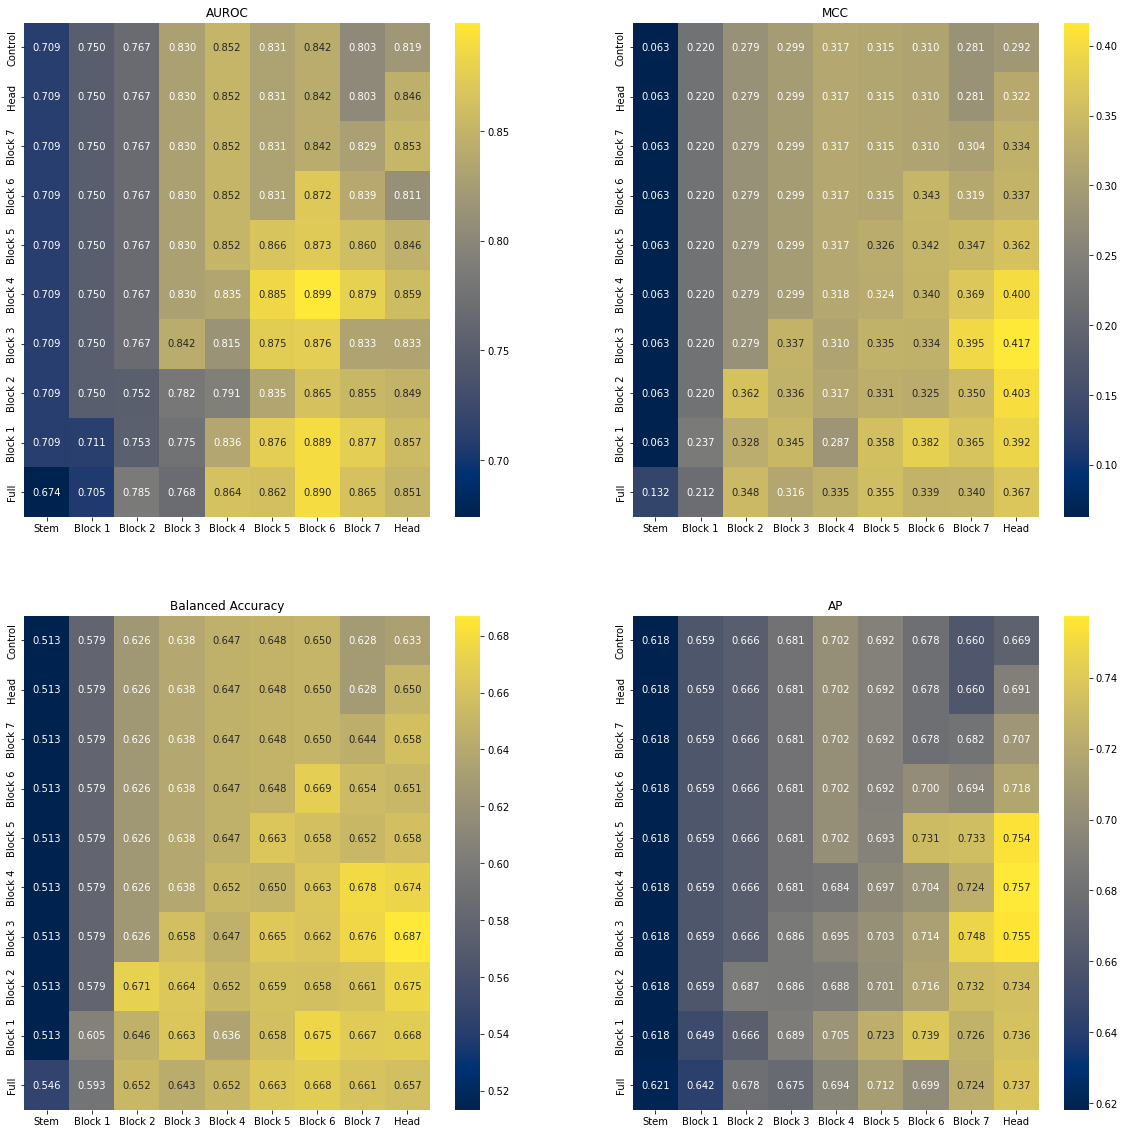

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

model_name = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]
layer_name = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]

import numpy as np

fig = plt.figure(figsize=(20, 20))
for i, mtx in enumerate(['AUROC', 'MCC',
       'Balanced Accuracy', 'AP']):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.set_title(mtx)

    rec = [[0 for i in layer_name] for j in model_name]
    for i, m in enumerate(model_name):
        for j, l in enumerate(layer_name):
            x = np.median([dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx] for seed in range(5)])
            rec[i][j] = x
    df = pd.DataFrame(rec)
    df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
    df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

    sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
plt.savefig(f"../../outputs/230607_loo_mean_res_median.png", dpi=300)
plt.show()



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  app.launch_new_instance()


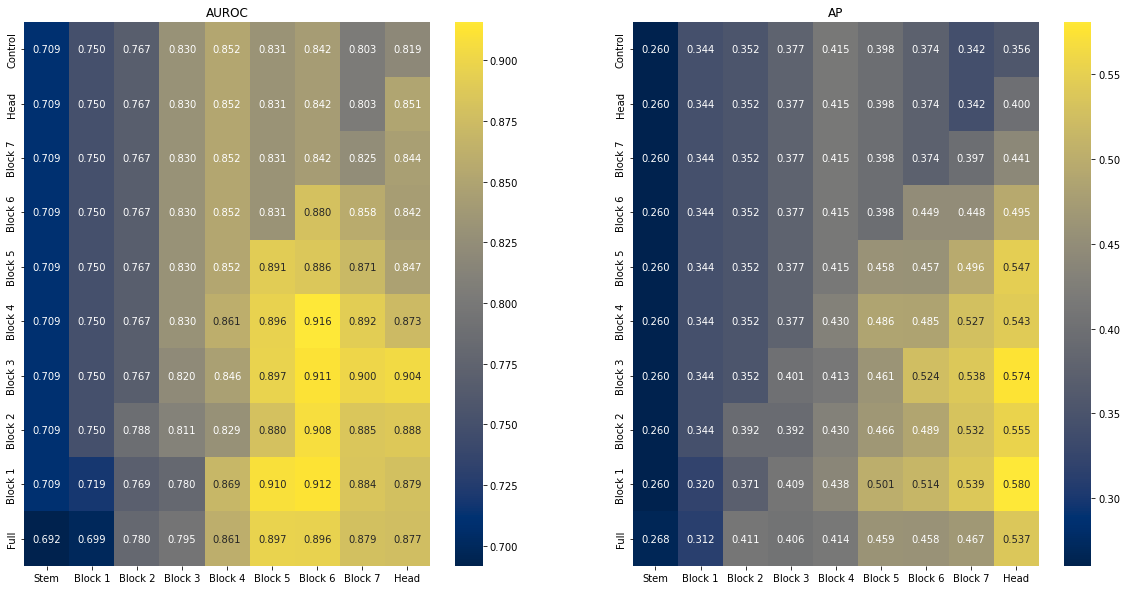

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

model_name = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]
layer_name = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]

import numpy as np

fig = plt.figure(figsize=(20, 10))
for i, mtx in enumerate(['AUROC', 'AP']):
    ax = fig.add_subplot(1, 2, i + 1)
    ax.set_title(mtx)

    rec = [[0 for i in layer_name] for j in model_name]
    for i, m in enumerate(model_name):
        for j, l in enumerate(layer_name):
            x = np.mean([dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx] for seed in range(5)])
            rec[i][j] = x
    df = pd.DataFrame(rec)
    df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
    df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

    sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
plt.savefig(f"/mnt/local/extHDD2/data/toxcnn/230721_loo_mean_res_mean.png", dpi=300)

plt.show()



In [22]:
!mkdir ../../outputs/230607_loo_mean_res_mean/

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


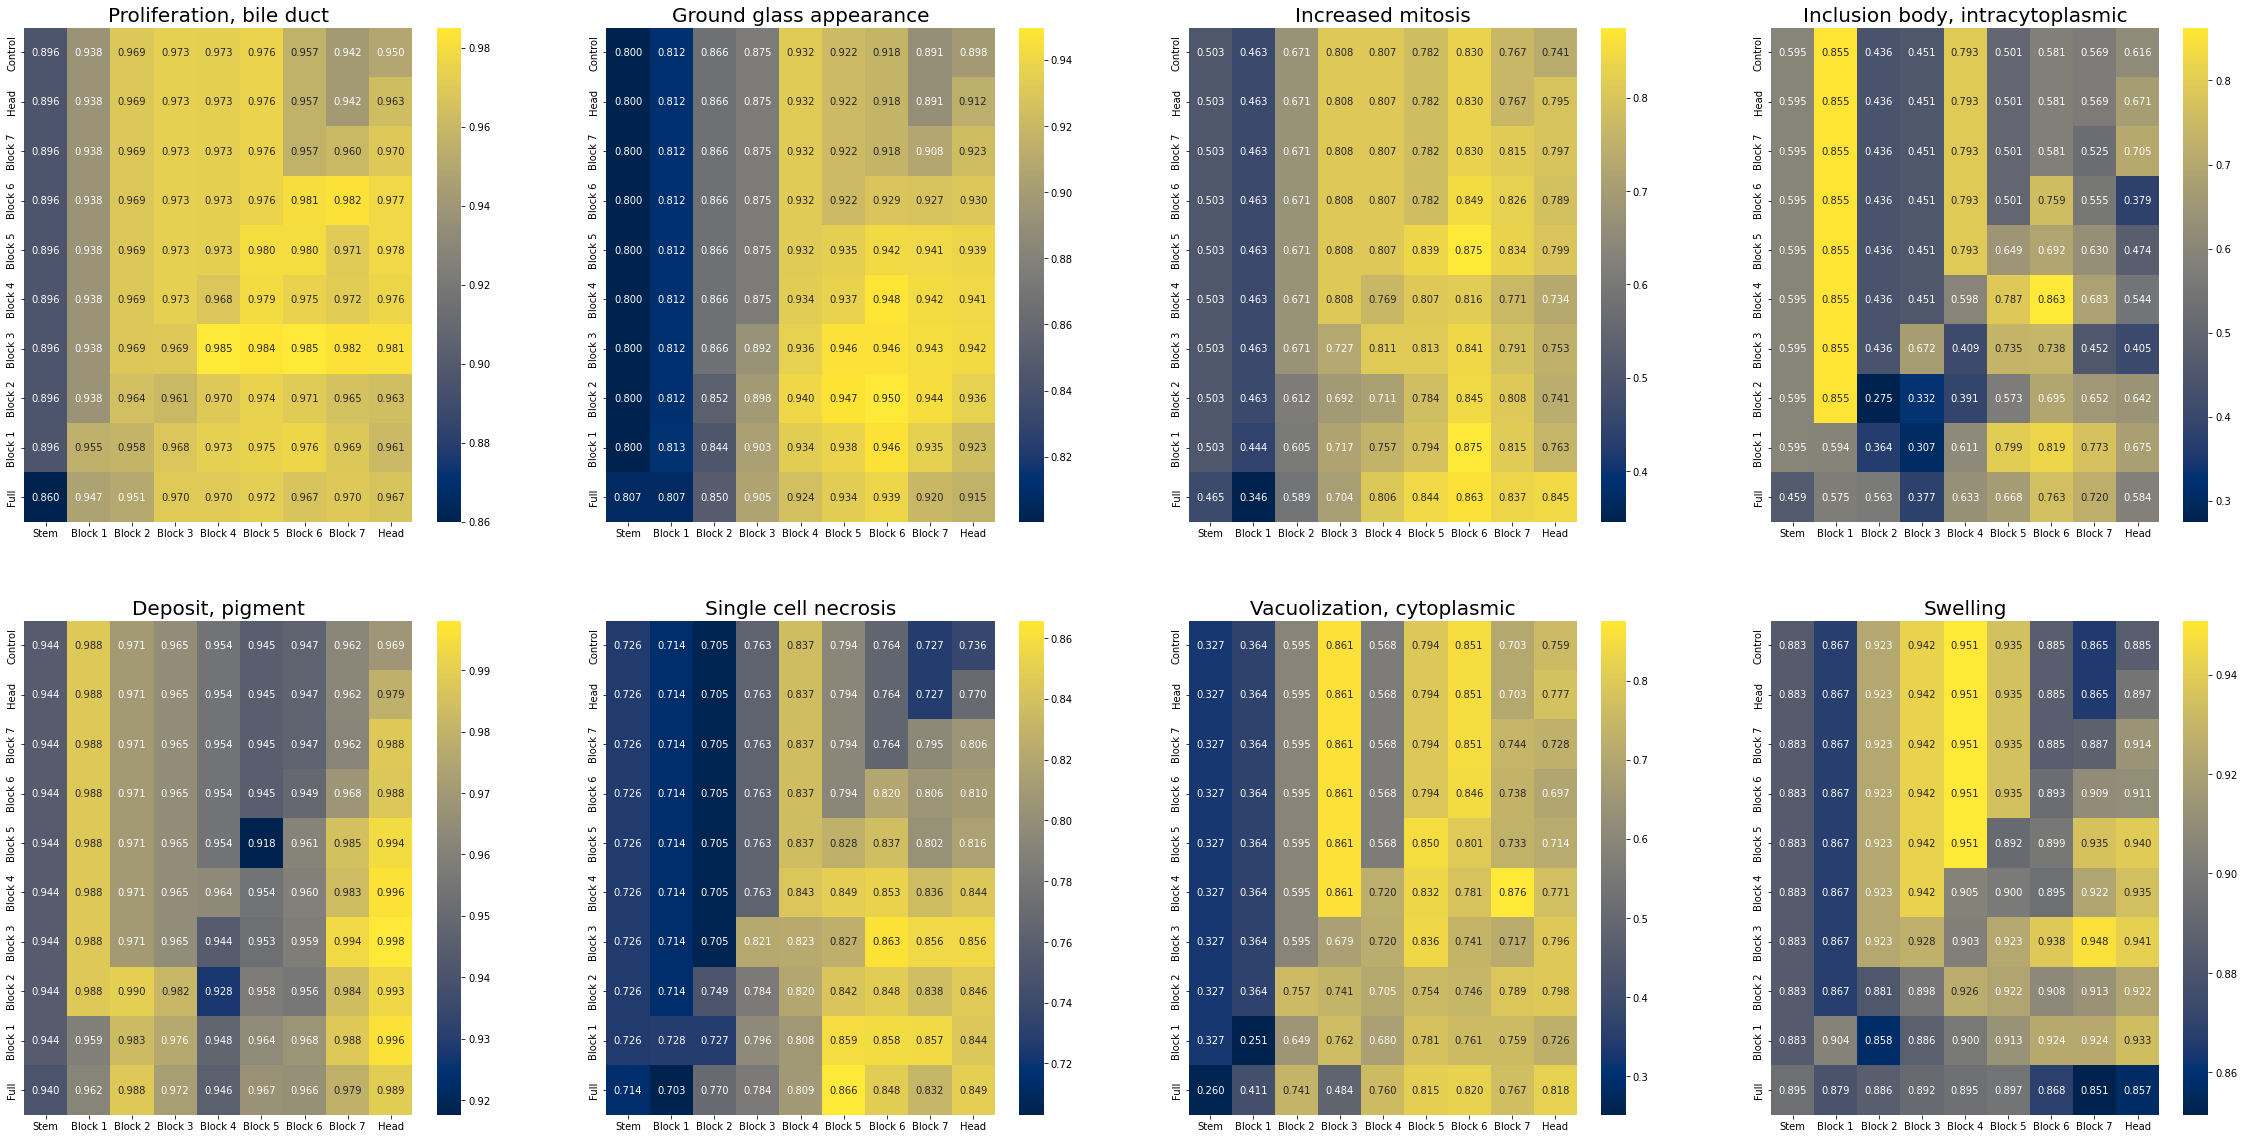

In [26]:
fig = plt.figure(figsize=(40, 20))
for p, path in enumerate(dfs[0]["pathological findings"].unique()):
    for i, mtx in enumerate(['AUROC']):
        ax = fig.add_subplot(2, 4, p + 1)
        ax.set_title(path, fontsize=20)

        rec = [[0 for i in layer_name] for j in model_name]
        for i, m in enumerate(model_name):
            for j, l in enumerate(layer_name):
                x = np.mean([dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l) & (dfs[seed]["pathological findings"]==path)].mean(axis=0)[mtx] for seed in range(5)])
                rec[i][j] = x
        df = pd.DataFrame(rec)
        df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
        df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

        sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
plt.savefig(f"../../outputs/230607_loo_mean_res_mean_path.png", dpi=300)

plt.show()


In [8]:
mad = [[[[0 for i in layer_name] for j in model_name] for seed in range(5)] for m in range(4)]

for s, mtx in enumerate(['AUROC', 'MCC',
       'Balanced Accuracy', 'AP']):
    
    for i, m in enumerate(model_name):
        for j, l in enumerate(layer_name):
            x = np.median([dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx] for seed in range(5)])
            for seed in range(5):
                mad[s][seed][i][j] = abs(dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx]-x)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


In [9]:
count = 0
madv = [[0]*5 for s in range(4)]
for s in range(4):
    for seed in range(5):
        for i in range(10):
            for j in range(9):
                if i+j>=8:
                    madv[s][seed] += mad[s][seed][i][j]
                    count += 1

In [10]:
[[madv[s][seed]/count for seed in range(5)] for s in range(4)]

[[0.0005534577782669289,
  0.0006144188442752513,
  0.0006973669263375909,
  0.0005581102470417718,
  0.0006669763936256491],
 [0.0006529906085120837,
  0.0005456922235528741,
  0.0007032342296029752,
  0.0007779302542074948,
  0.0007642744608544821],
 [0.00028371919039357464,
  0.0003300159595590101,
  0.0002841342761316453,
  0.00047308205917549317,
  0.0003904101251503038],
 [0.0007068739615951178,
  0.0007354184412272692,
  0.0006411723701178044,
  0.0006934731543319632,
  0.0006928591529759418]]

In [11]:
dfs = [pd.read_csv(f"../../outputs/results/230308finding_type_validation_seed{123+seed}_epoch5.csv") for seed in range(5)]
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


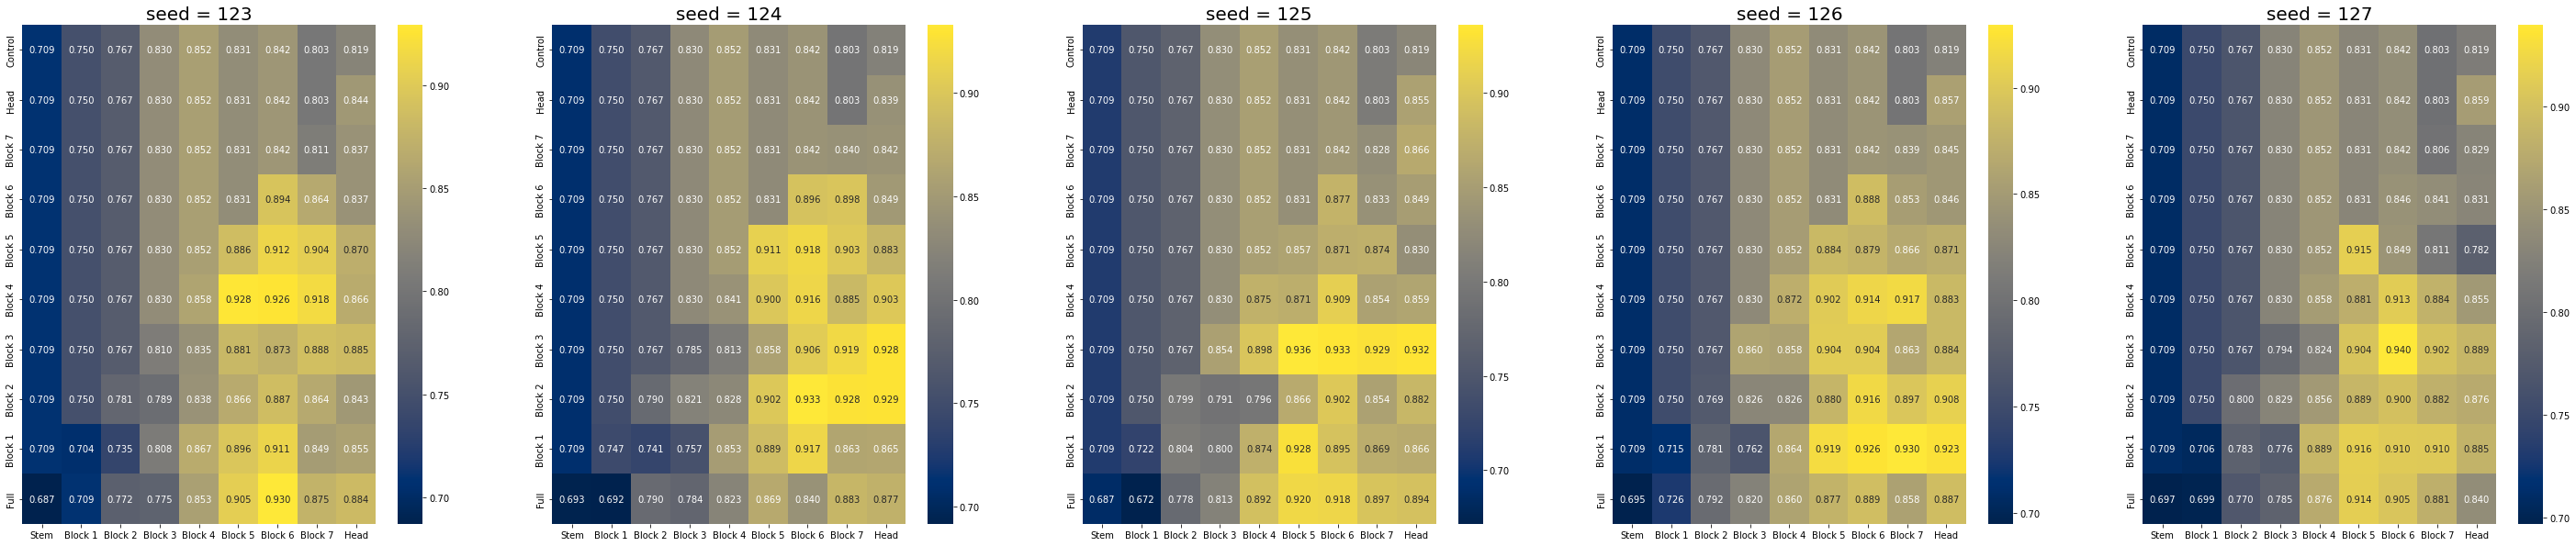

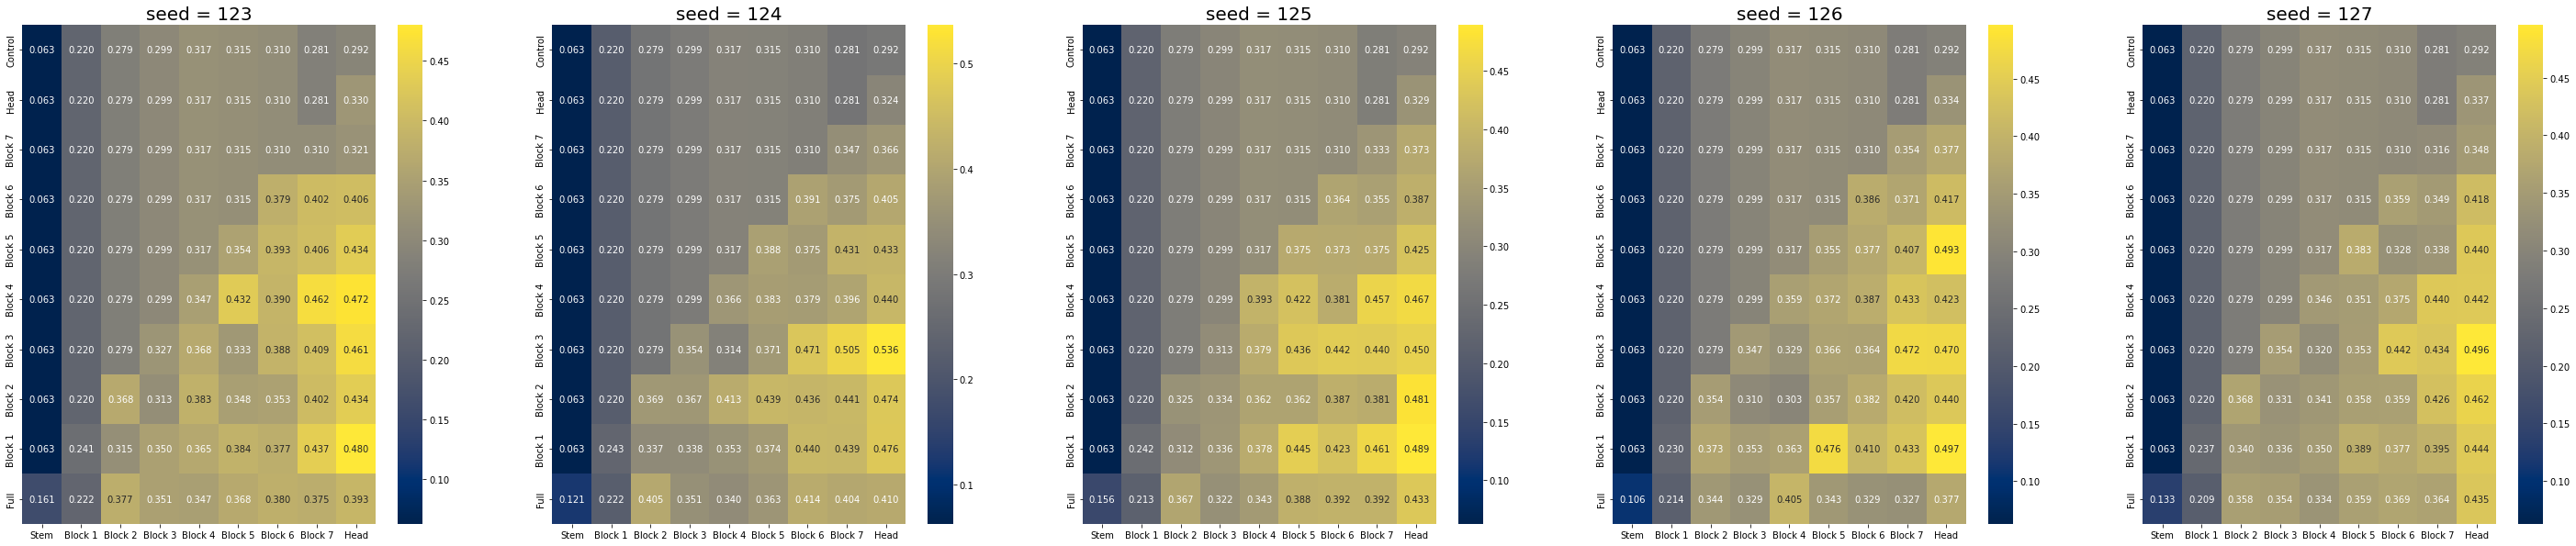

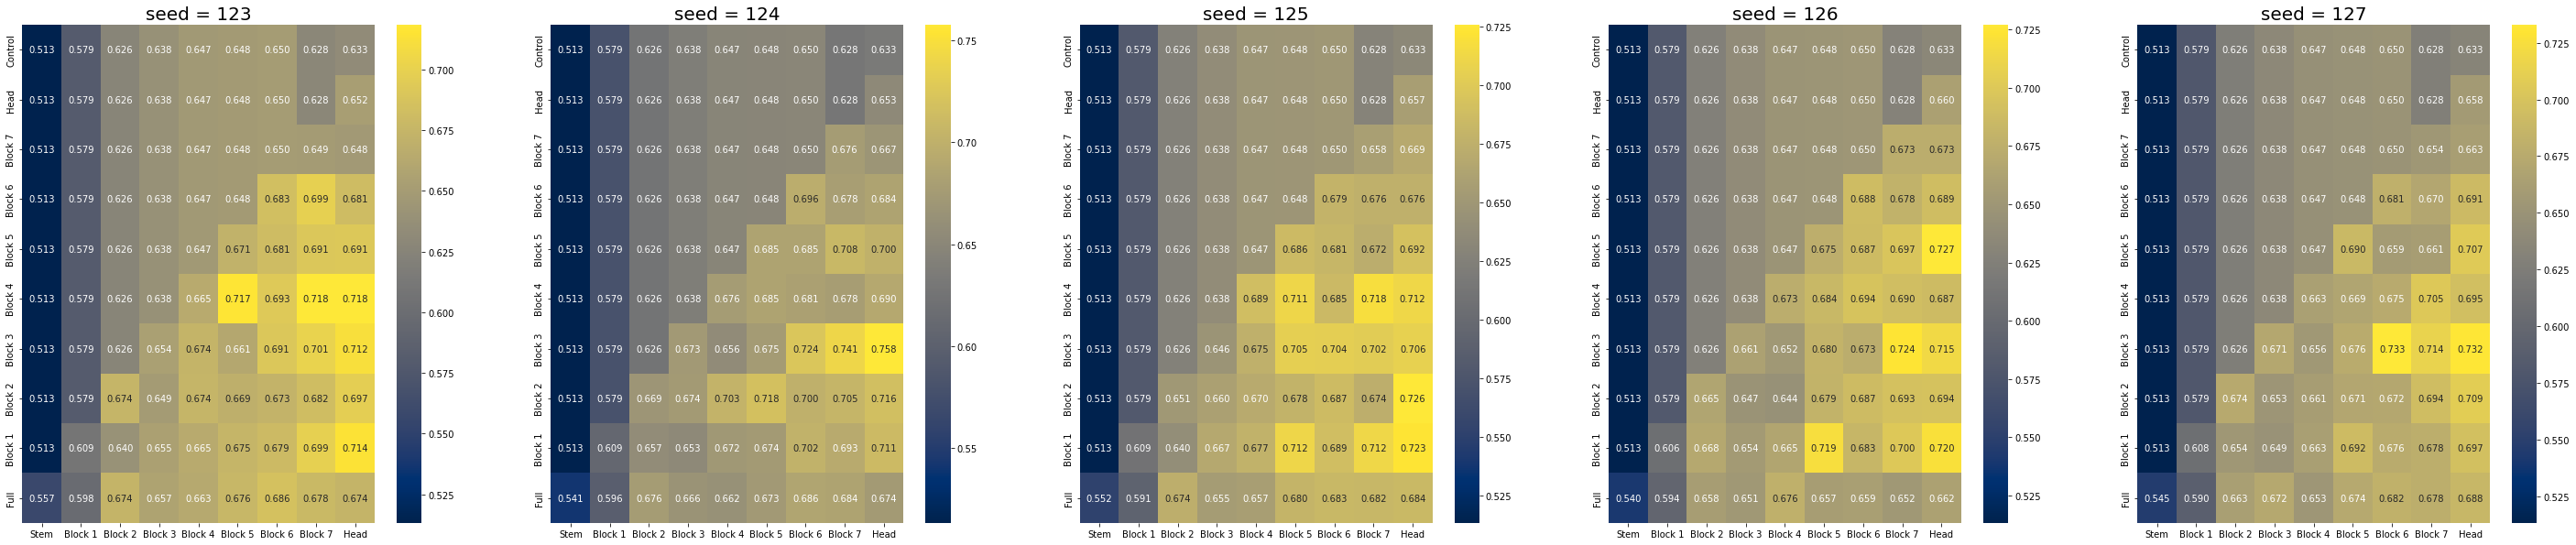

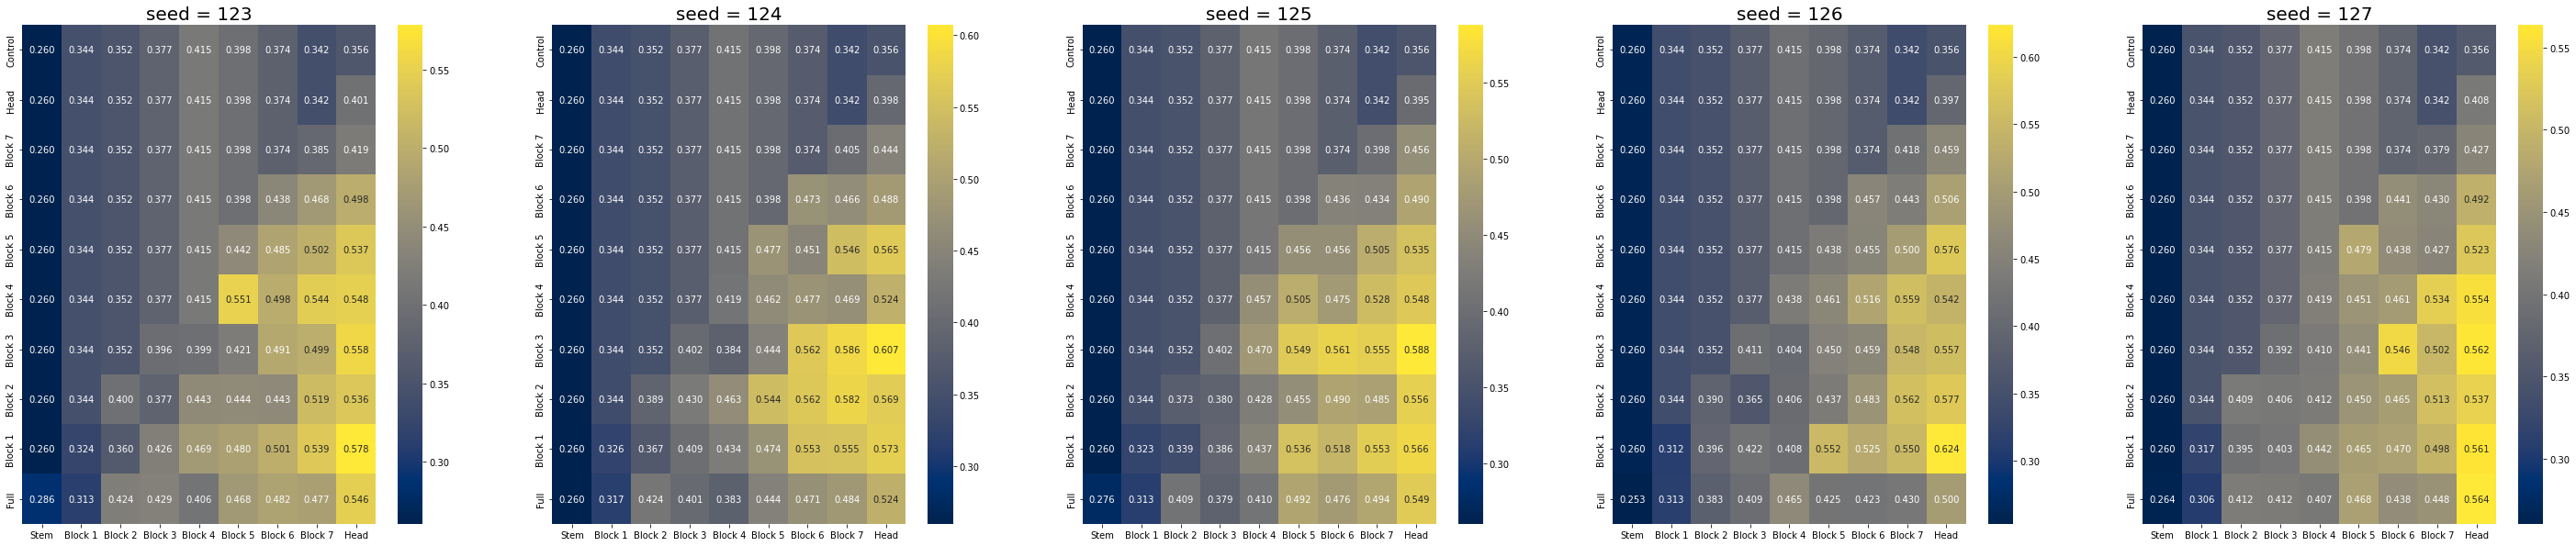

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

model_name = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]
layer_name = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]

import numpy as np


for i, mtx in enumerate(['AUROC', 'MCC',
       'Balanced Accuracy', 'AP']):
    fig = plt.figure(figsize=(50, 10))
    for seed in range(5):
        ax = fig.add_subplot(1, 5, seed + 1)
        ax.set_title(f"seed = {seed + 123}", fontdict={"fontsize":20})

        rec = [[0 for i in layer_name] for j in model_name]
        for i, m in enumerate(model_name):
            for j, l in enumerate(layer_name):
                x = dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx]
                rec[i][j] = x
        df = pd.DataFrame(rec)
        df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
        df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

        sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
    plt.savefig(f"../../outputs/230607_ft_mean_res_{mtx}.png", dpi=300)
    plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


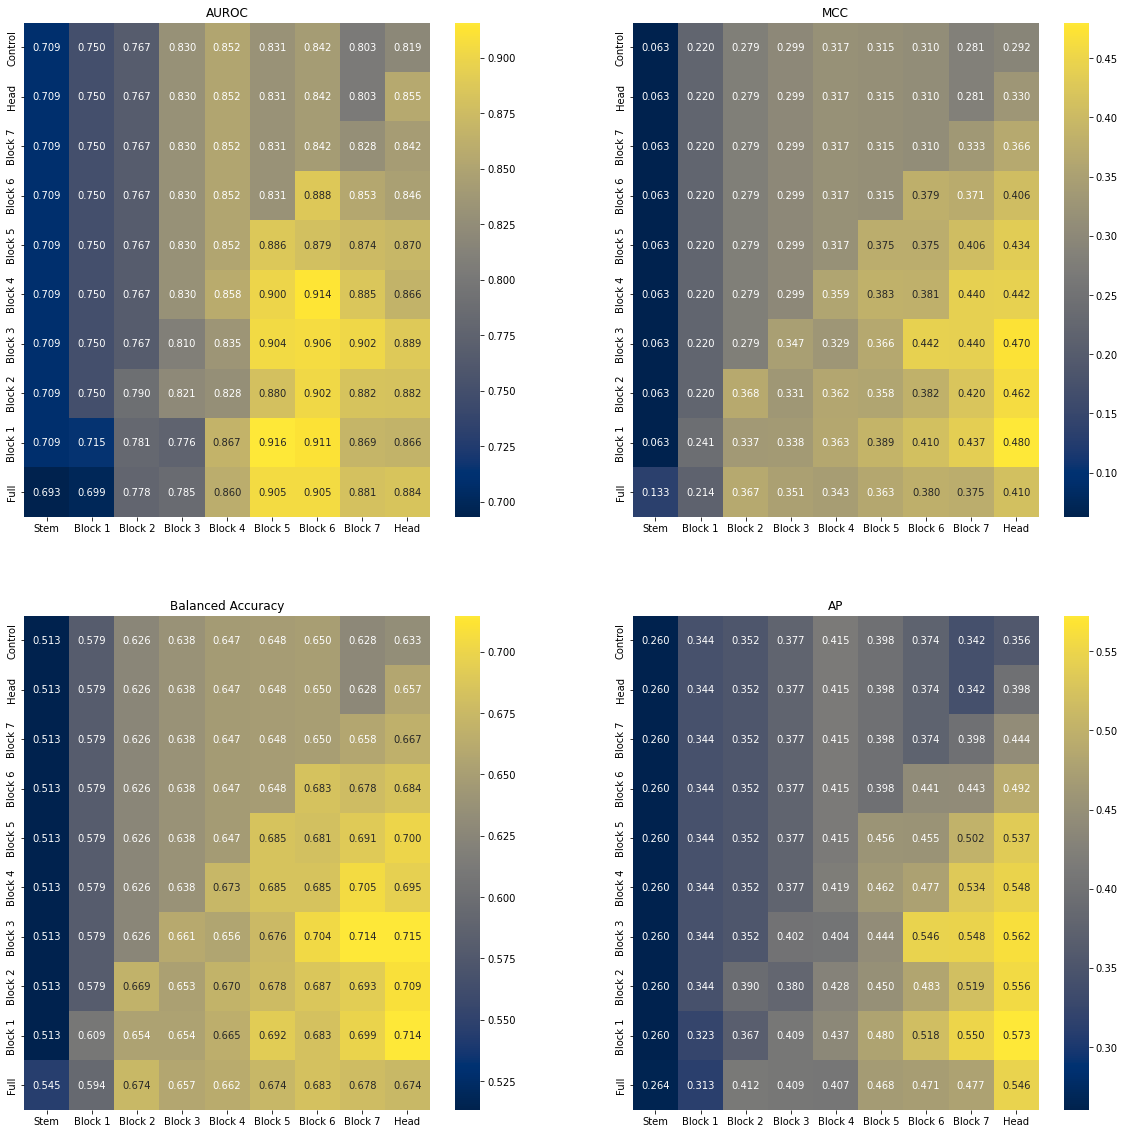

In [13]:
fig = plt.figure(figsize=(20, 20))
for i, mtx in enumerate(['AUROC', 'MCC',
       'Balanced Accuracy', 'AP']):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.set_title(mtx)

    rec = [[0 for i in layer_name] for j in model_name]
    for i, m in enumerate(model_name):
        for j, l in enumerate(layer_name):
            x = np.median([dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx] for seed in range(5)])
            rec[i][j] = x
    df = pd.DataFrame(rec)
    df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
    df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

    sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
plt.savefig(f"../../outputs/230607_ft_mean_res_median.png", dpi=300)
plt.show()



In [ ]:
fig = plt.figure(figsize=(20, 20))
for i, mtx in enumerate(['AUROC', 'MCC',
       'Balanced Accuracy', 'AP']):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.set_title(mtx)

    rec = [[0 for i in layer_name] for j in model_name]
    for i, m in enumerate(model_name):
        for j, l in enumerate(layer_name):
            x = np.median([dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx] for seed in range(5)])
            rec[i][j] = x
    df = pd.DataFrame(rec)
    df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
    df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

    sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
plt.savefig(f"../../outputs/230607_ft_mean_res_median.png", dpi=300)
plt.show()



In [63]:
mad = [[[[0 for i in layer_name] for j in model_name] for seed in range(5)] for m in range(4)]

for s, mtx in enumerate(['AUROC', 'MCC',
       'Balanced Accuracy', 'AP']):
    
    for i, m in enumerate(model_name):
        for j, l in enumerate(layer_name):
            x = np.median([dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx] for seed in range(5)])
            for seed in range(5):
                mad[s][seed][i][j] = abs(dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx]-x)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


[0.002361689456529488,
 0.003188776492197436,
 0.002308468575603397,
 0.0034463843669043357,
 0.0024163595249790744]

In [65]:
count = 0
madv = [[0]*5 for s in range(4)]
for s in range(4):
    for seed in range(5):
        for i in range(10):
            for j in range(9):
                if i+j>=8:
                    madv[s][seed] += mad[s][seed][i][j]
                    count += 1

In [66]:
[[madv[s][seed]/count for seed in range(5)] for s in range(4)]

[[0.0005678513345411457,
  0.0007895445924017461,
  0.0007515544001812055,
  0.0005505575817631999,
  0.0005996995060391366],
 [0.000666665676138093,
  0.0007044566911030013,
  0.0007165852077453845,
  0.000799502254643855,
  0.0005540384122909975],
 [0.0003279039096451447,
  0.0003759172221346805,
  0.00035661739215392456,
  0.0003585965128093968,
  0.00030059675134492164],
 [0.000590422364132372,
  0.000797194123049359,
  0.0005771171439008493,
  0.0008615960917260839,
  0.0006040898812447686]]

In [123]:
dfs = [pd.read_csv(f"../../outputs/results/23310compound_validation_macro_{seed+123}.csv") for seed in range(5)]
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


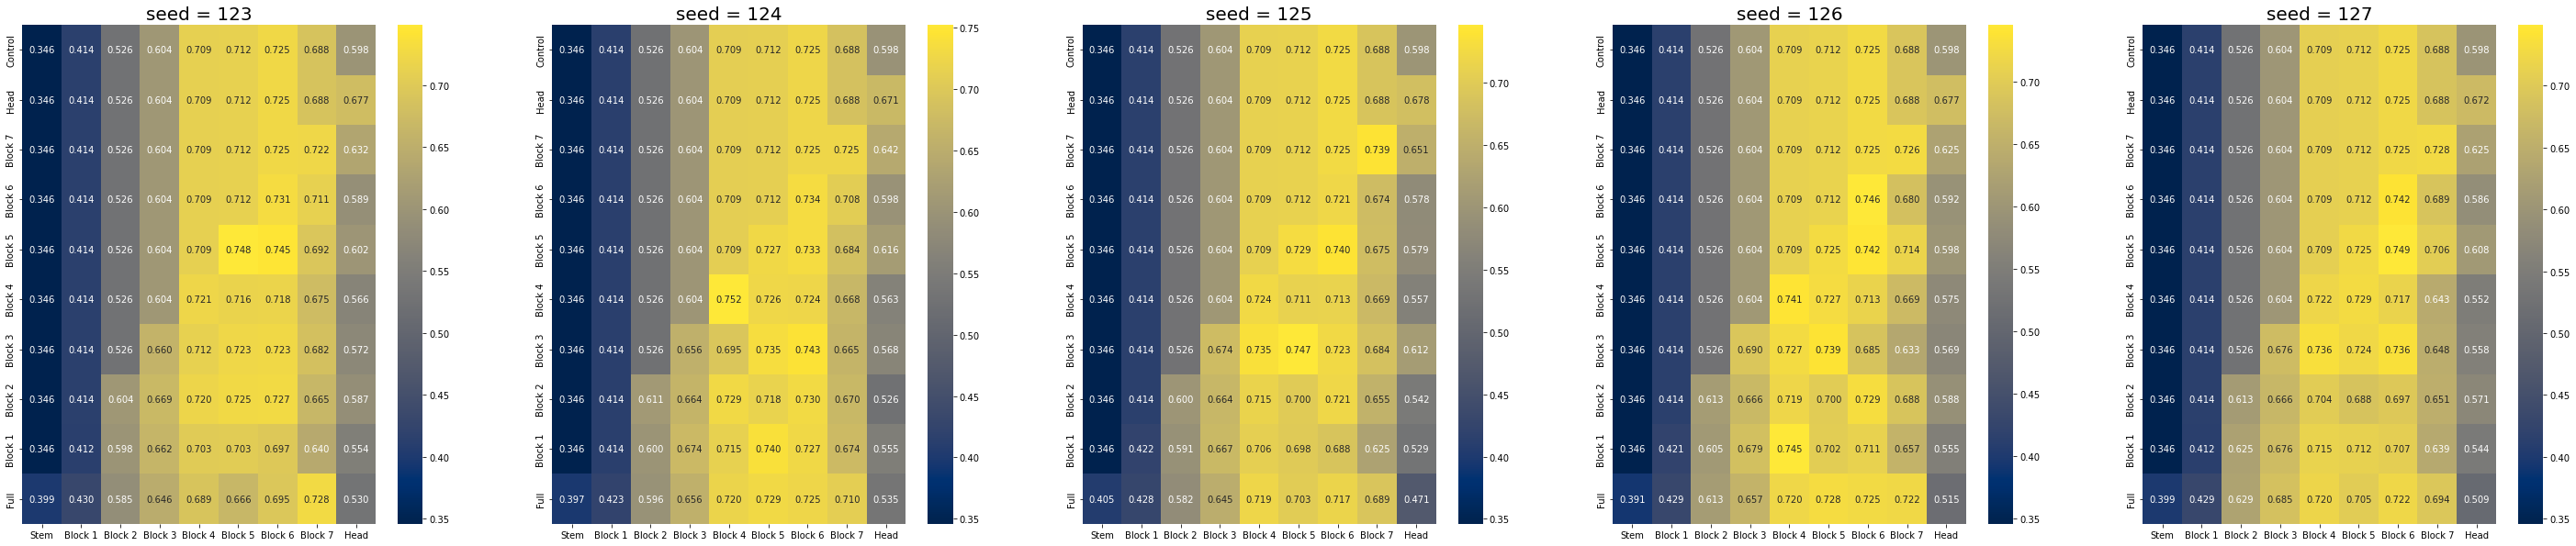

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

model_name = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]
layer_name = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]

import numpy as np


for i, mtx in enumerate(['Balanced Accuracy']):
    fig = plt.figure(figsize=(50, 10))
    for seed in range(5):
        ax = fig.add_subplot(1, 5, seed + 1)
        ax.set_title(f"seed = {seed + 123}", fontdict={"fontsize":20})

        rec = [[0 for i in layer_name] for j in model_name]
        for i, m in enumerate(model_name):
            for j, l in enumerate(layer_name):
                x = dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx]
                rec[i][j] = x
        df = pd.DataFrame(rec)
        df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
        df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

        sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
    plt.savefig(f"../../outputs/230607_moa_mean_res_{mtx}.png", dpi=300)
    plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == "__main__":


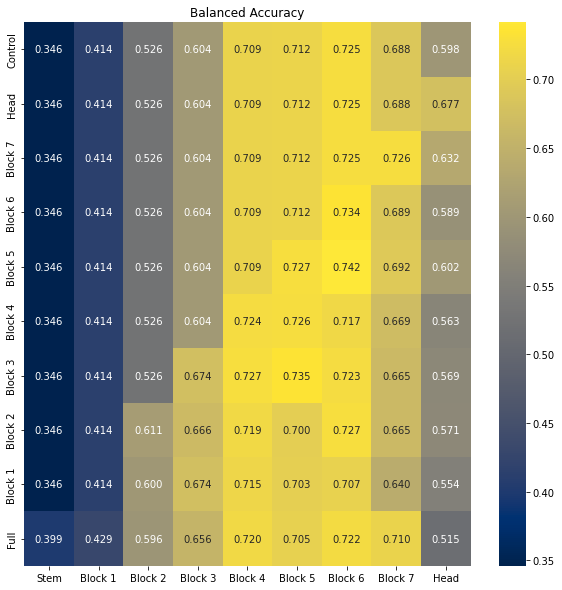

In [109]:
fig = plt.figure(figsize=(10, 10))
for i, mtx in enumerate(['Balanced Accuracy']):
    ax = fig.add_subplot(1, 1, i + 1)
    ax.set_title(mtx)

    rec = [[0 for i in layer_name] for j in model_name]
    for i, m in enumerate(model_name):
        for j, l in enumerate(layer_name):
            x = np.median([dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx] for seed in range(5)])
            rec[i][j] = x
    df = pd.DataFrame(rec)
    df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
    df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

    sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
plt.savefig(f"../../outputs/230607_moa_mean_res_median.png", dpi=300)
plt.show()



In [125]:
dfs = [pd.read_csv(f"../../outputs/results/230413TGGATEs_Fscore_seed{seed+123}.csv") for seed in range(5)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


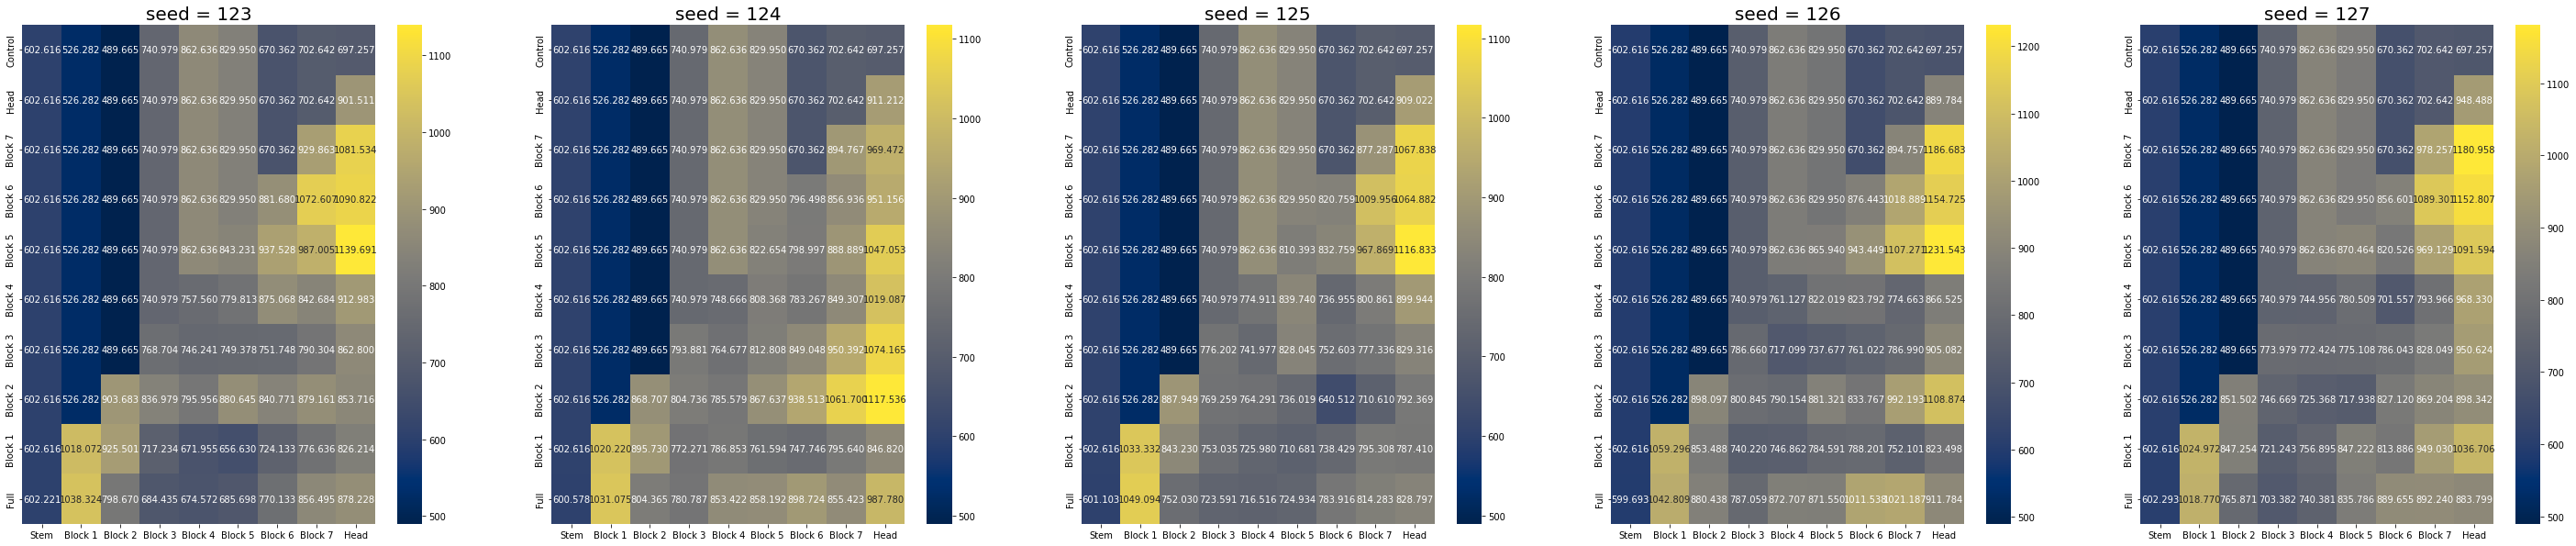

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

model_name = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]
layer_name = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]

import numpy as np


for i, mtx in enumerate(['Pseudo F Score (Compound)']):
    fig = plt.figure(figsize=(50, 10))
    for seed in range(5):
        ax = fig.add_subplot(1, 5, seed + 1)
        ax.set_title(f"seed = {seed + 123}", fontdict={"fontsize":20})

        rec = [[0 for i in layer_name] for j in model_name]
        for i, m in enumerate(model_name):
            for j, l in enumerate(layer_name):
                x = dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx]
                rec[i][j] = x
        df = pd.DataFrame(rec)
        df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
        df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

        sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
    plt.savefig(f"../../outputs/230607_pseudof_mean_res_{mtx}.png", dpi=300)
    plt.show()


In [36]:
dfs[0].columns

Index(['model', 'layer', 'Pseudo F Score (MoA)', 'Pseudo F Score (Compound)'], dtype='object')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == "__main__":


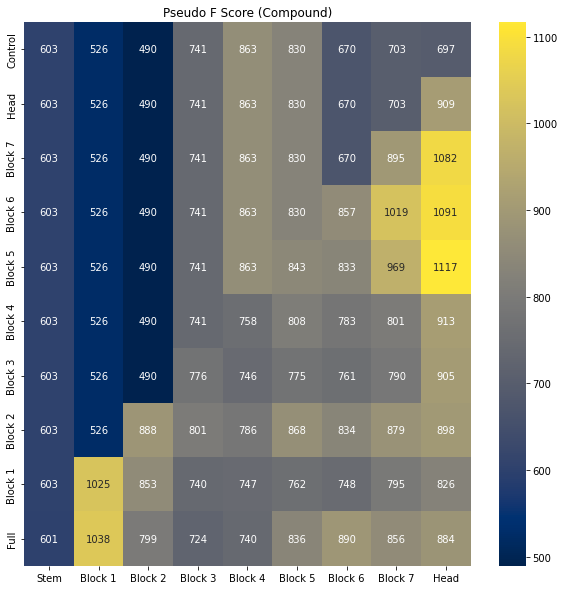

In [115]:
fig = plt.figure(figsize=(10, 10))
for i, mtx in enumerate(['Pseudo F Score (Compound)']):
    ax = fig.add_subplot(1, 1, i + 1)
    ax.set_title(mtx)

    rec = [[0 for i in layer_name] for j in model_name]
    for i, m in enumerate(model_name):
        for j, l in enumerate(layer_name):
            x = np.median([dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx] for seed in range(5)])
            rec[i][j] = x
    df = pd.DataFrame(rec)
    df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
    df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

    sns.heatmap(df, cmap="cividis", annot=True, fmt=".0f", ax=ax)
plt.savefig(f"../../outputs/230607_pseudof_mean_res_median.png", dpi=300)
plt.show()



In [127]:
import pandas as pd
dfs = [pd.read_csv(f"../../outputs/230311prognosis_result_{seed+123}.csv") for seed in range(5)]
    


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


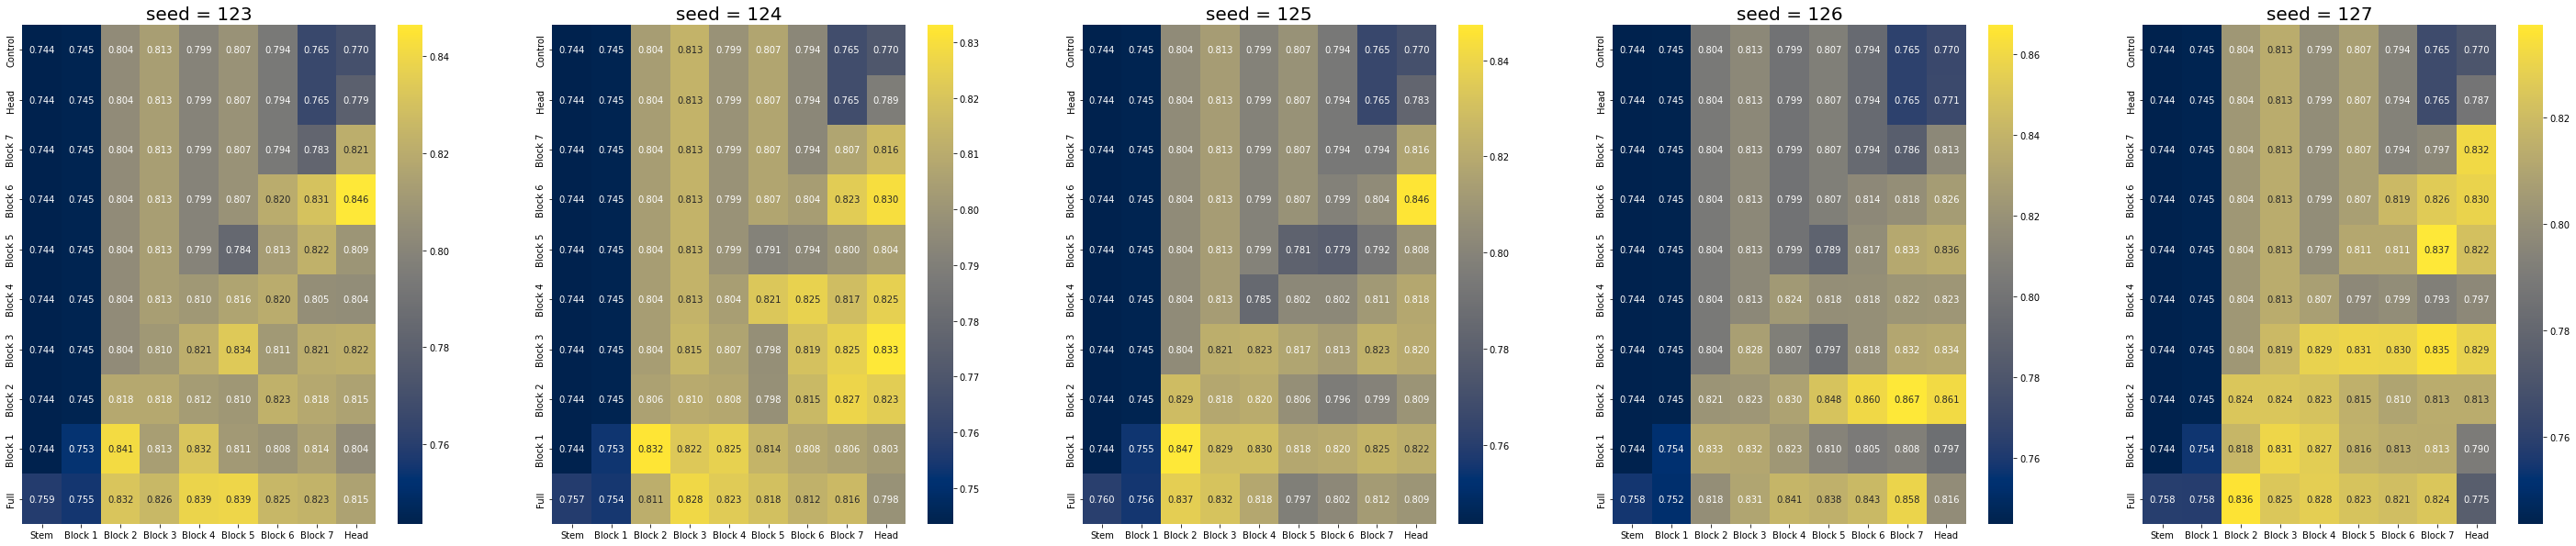

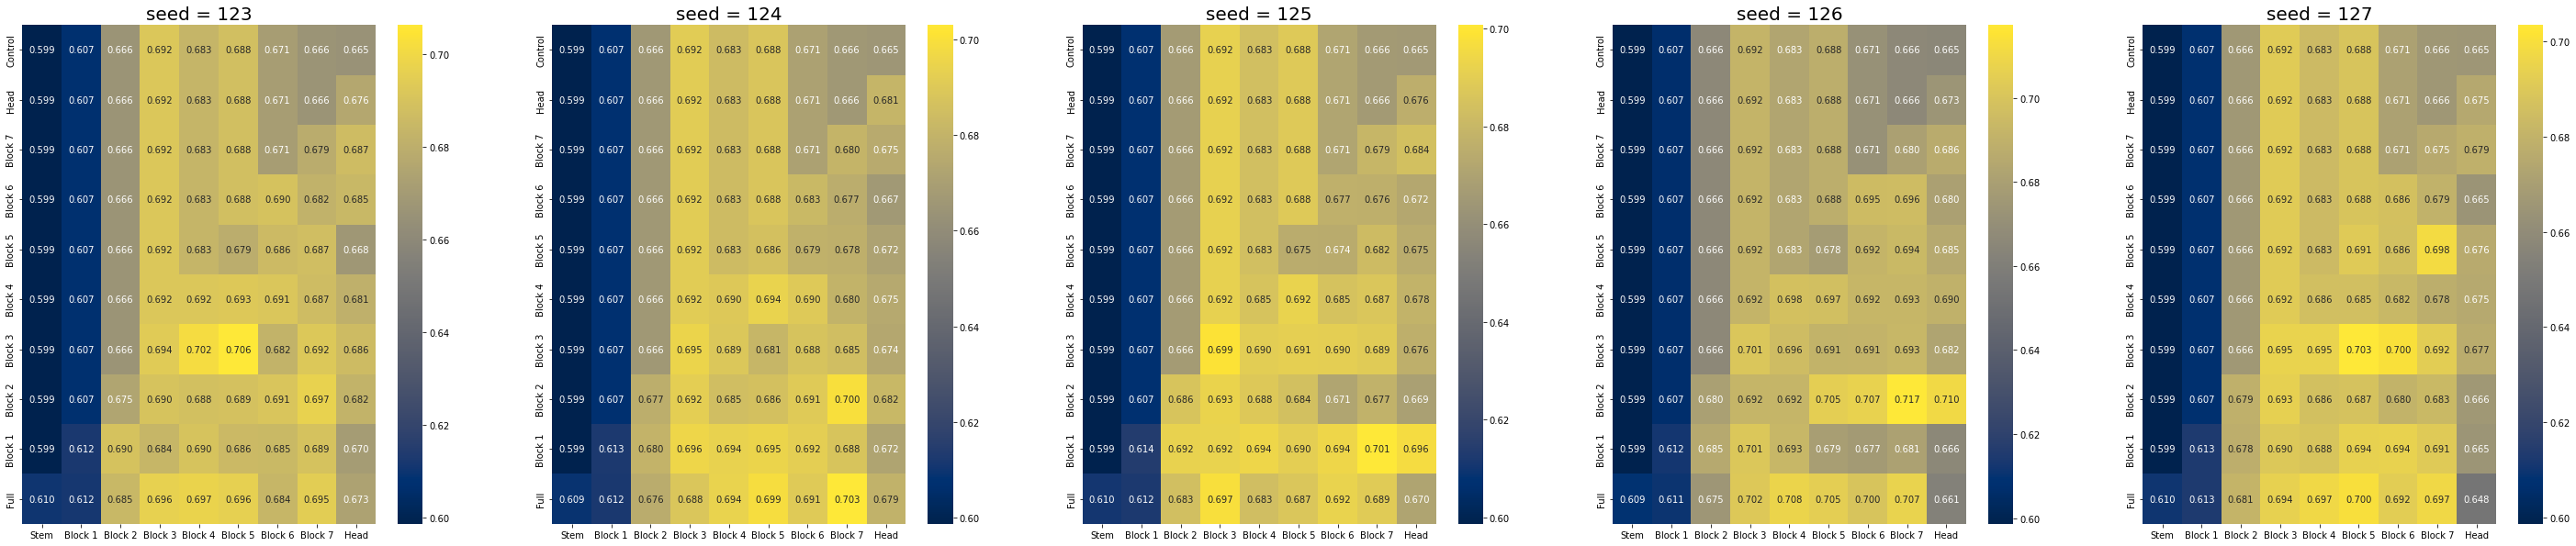

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

model_name = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]
layer_name = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]

import numpy as np


for i, mtx in enumerate(['AUROC', 'AP']):
    fig = plt.figure(figsize=(50, 10))
    for seed in range(5):
        ax = fig.add_subplot(1, 5, seed + 1)
        ax.set_title(f"seed = {seed + 123}", fontdict={"fontsize":20})

        rec = [[0 for i in layer_name] for j in model_name]
        for i, m in enumerate(model_name):
            for j, l in enumerate(layer_name):
                x = dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx]
                rec[i][j] = x
        df = pd.DataFrame(rec)
        df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
        df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

        sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
    plt.savefig(f"../../outputs/230607_prognosis_mean_res_{mtx}.png", dpi=300)
    plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == "__main__":


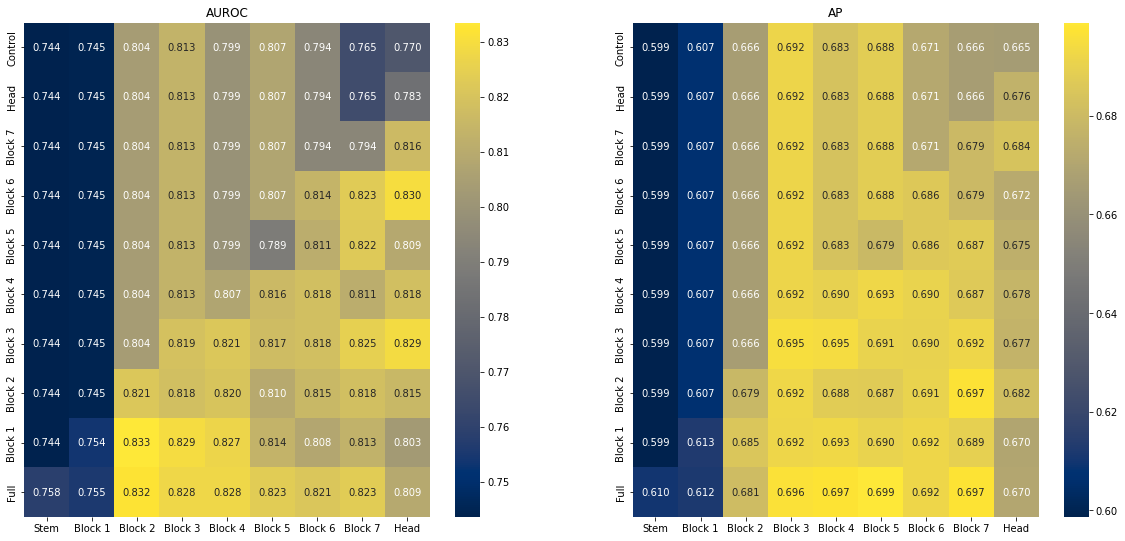

In [118]:
fig = plt.figure(figsize=(20, 20))
for i, mtx in enumerate(['AUROC', 'AP']):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.set_title(mtx)

    rec = [[0 for i in layer_name] for j in model_name]
    for i, m in enumerate(model_name):
        for j, l in enumerate(layer_name):
            x = np.median([dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx] for seed in range(5)])
            rec[i][j] = x
    df = pd.DataFrame(rec)
    df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
    df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

    sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
plt.savefig(f"../../outputs/230607_prognosis_mean_res_median.png", dpi=300)
plt.show()



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


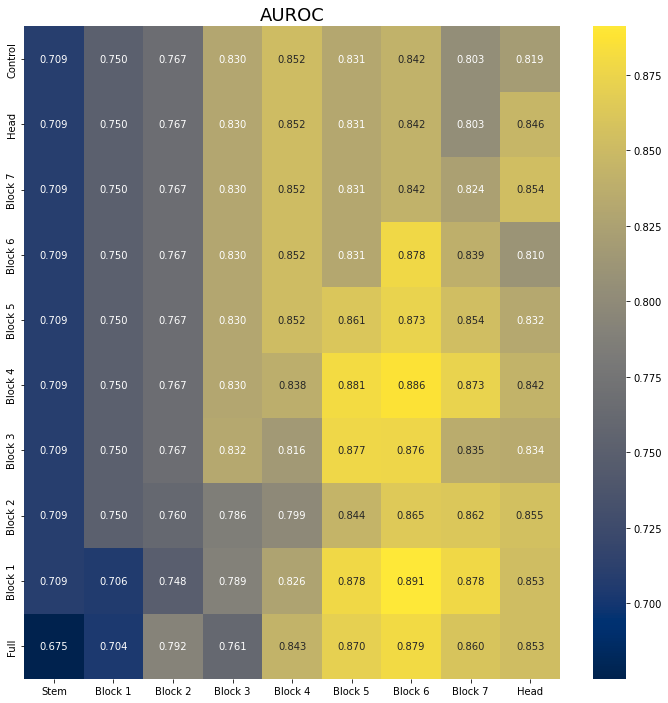

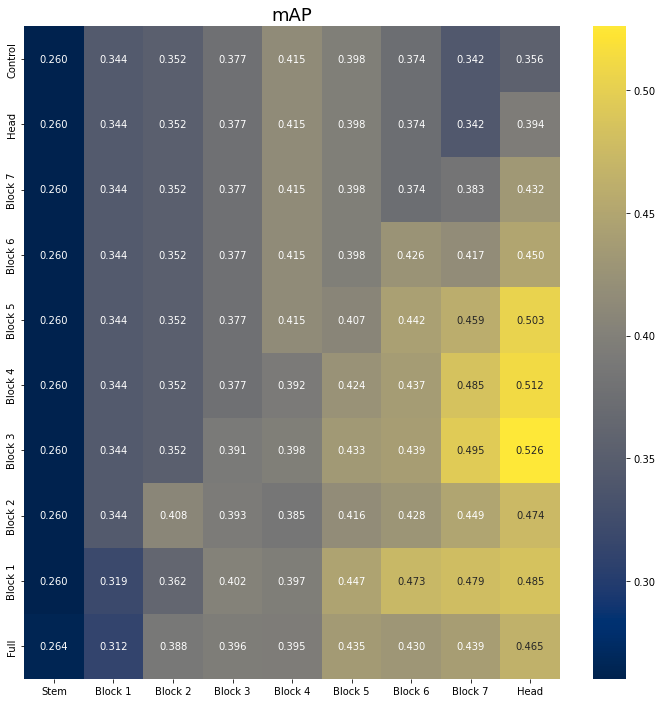

In [28]:
for i, mtx in enumerate(['AUROC', 'AP']):
    plt.figure(figsize=(12, 12))
    plt.title(mtx if mtx=="AUROC" else "mAP", fontsize=18)

    rec = [[0 for i in layer_name] for j in model_name]
    for i, m in enumerate(model_name):
        for j, l in enumerate(layer_name):
            x = np.mean([dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx] for seed in range(5)])
            rec[i][j] = x
    df = pd.DataFrame(rec)
    df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
    df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

    sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f")
    plt.savefig(f"../../outputs/230704_prognosis_mean_res_mean_{mtx}.png", bbox_inches="tight", dpi=300)
    plt.show()



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


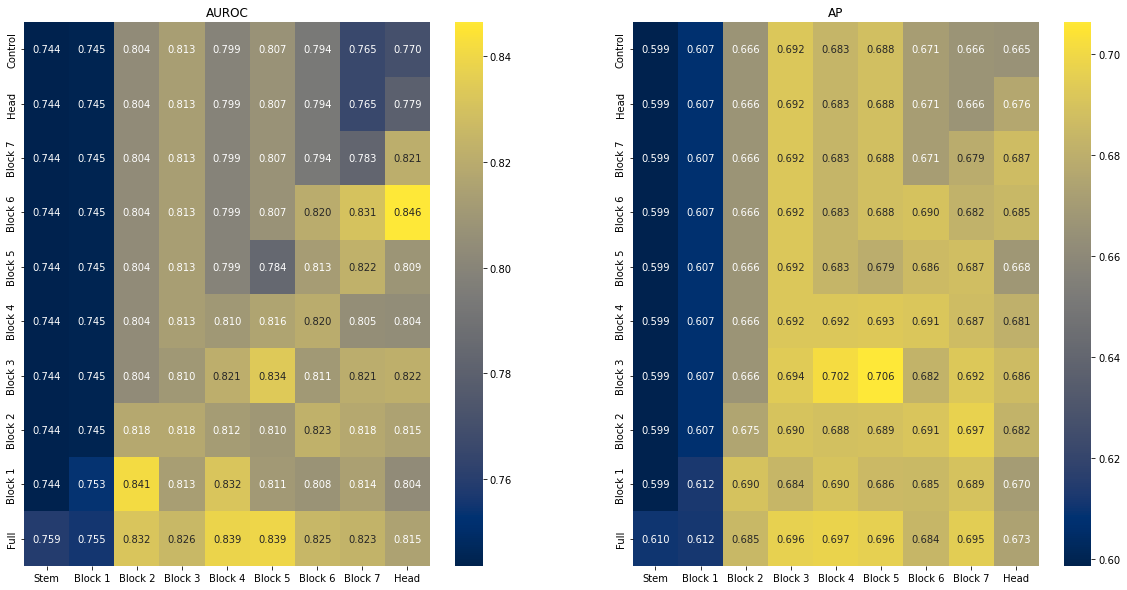

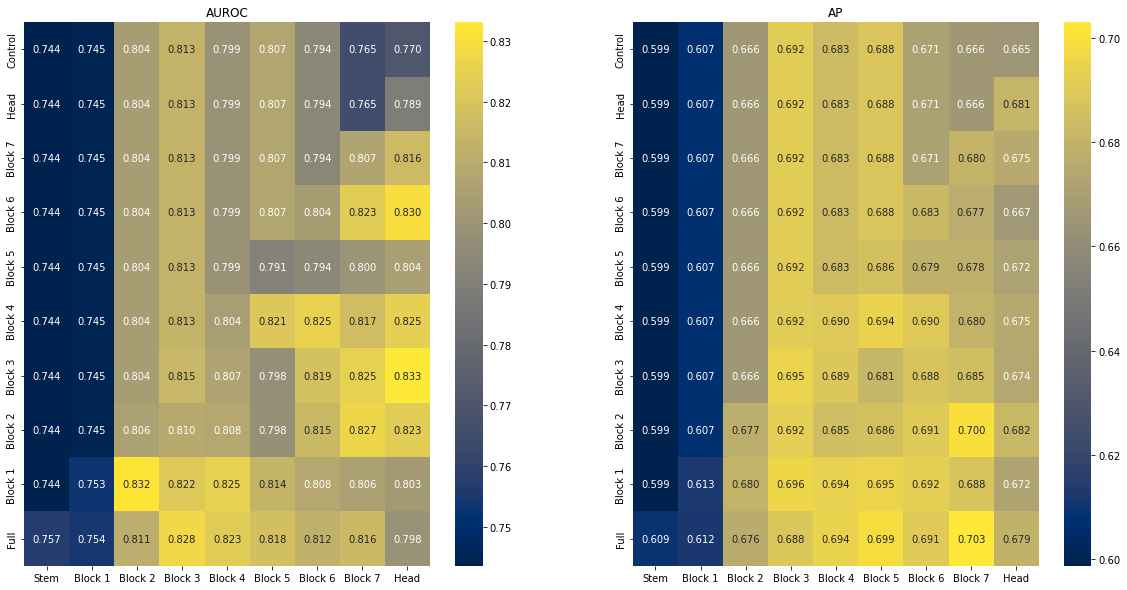

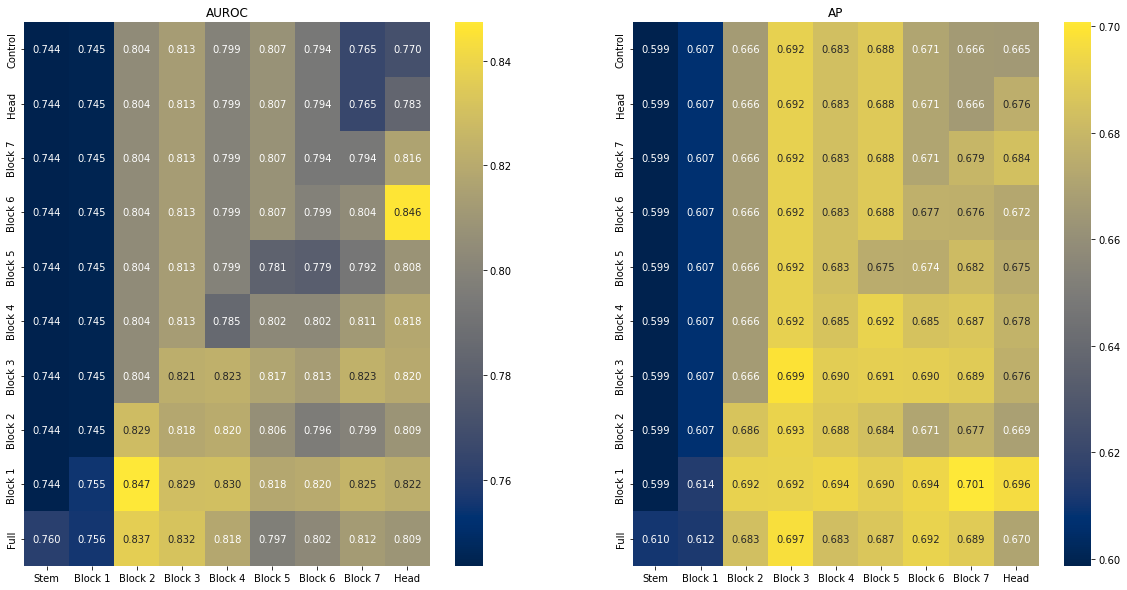

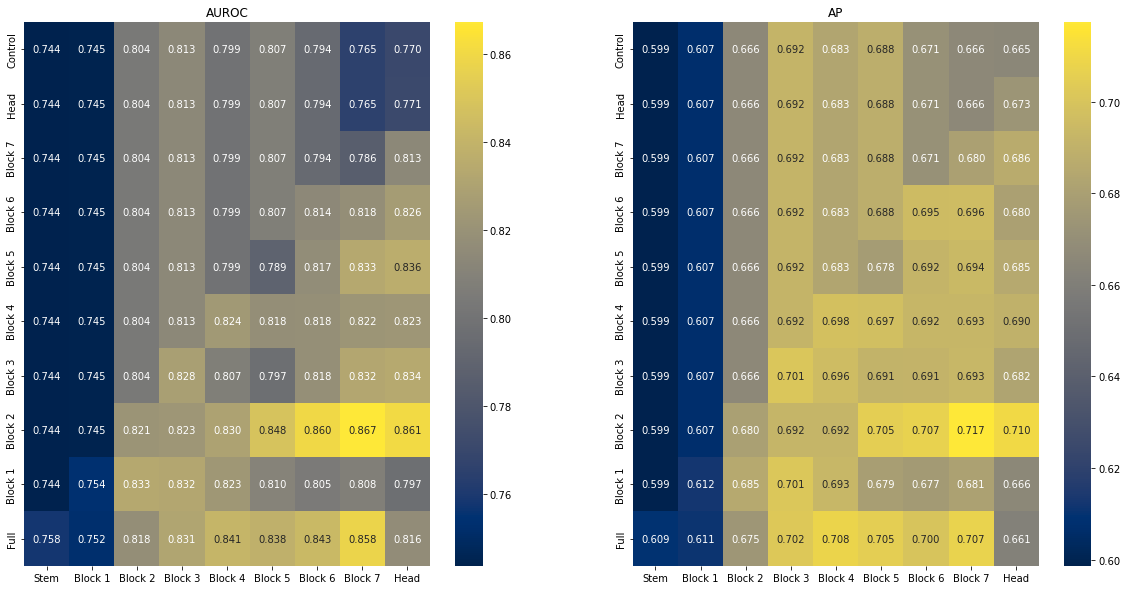

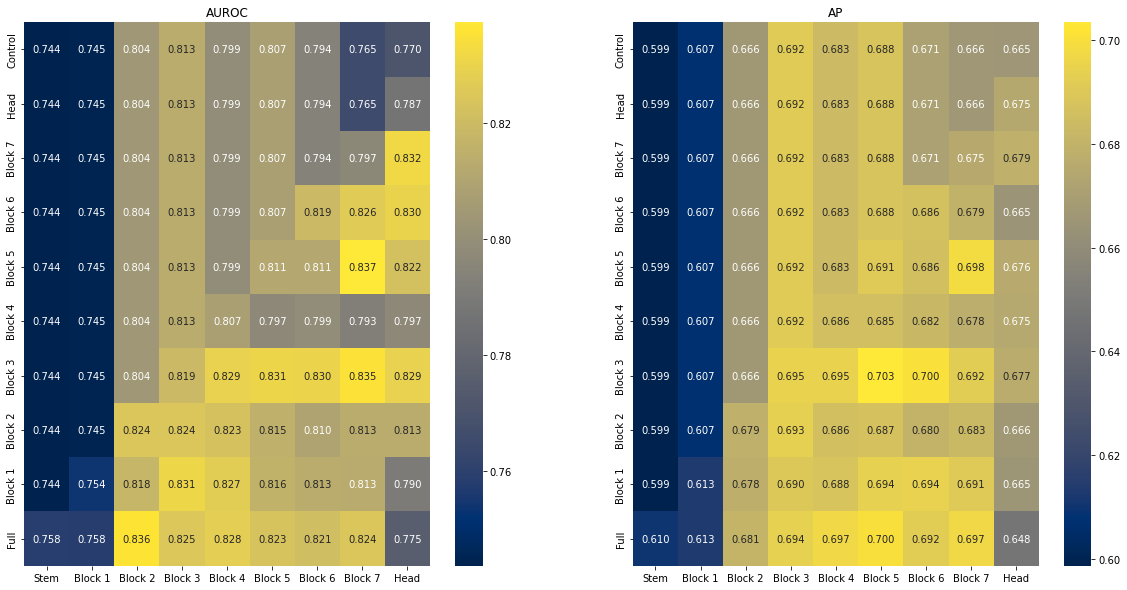

In [85]:
for seed in range(5):
    fig = plt.figure(figsize=(20, 10))
    for i, mtx in enumerate(['AUROC', 'AP']):
        ax = fig.add_subplot(1, 2, i + 1)
        ax.set_title(mtx)

        rec = [[0 for i in layer_name] for j in model_name]
        for i, m in enumerate(model_name):
            for j, l in enumerate(layer_name):
                x = dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx]
                rec[i][j] = x
        df = pd.DataFrame(rec)
        df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
        df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

        sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
    plt.show()



In [80]:
mad = [[[[0 for i in layer_name] for j in model_name] for seed in range(5)] for m in range(4)]

for s, mtx in enumerate(['AUROC', 'AP']):
    
    for i, m in enumerate(model_name):
        for j, l in enumerate(layer_name):
            x = np.median([dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx] for seed in range(5)])
            for seed in range(5):
                mad[s][seed][i][j] = abs(dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx]-x)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == "__main__":


In [81]:
count = 0
madv = [[0]*5 for s in range(2)]
for s in range(2):
    for seed in range(5):
        for i in range(10):
            for j in range(9):
                if i+j>=8:
                    madv[s][seed] += mad[s][seed][i][j]
                    count += 1

In [82]:
[[madv[s][seed]/count for seed in range(5)] for s in range(2)]

[[0.00040558827636078996,
  0.0005372673346509423,
  0.0007228109833257478,
  0.0009133809979298127,
  0.0005808516894343375],
 [0.00024889711585767527,
  0.0002798279746466537,
  0.00038196783585470515,
  0.000567382384646631,
  0.0003604536719046357]]

In [8]:
ml_set = set()
model_name = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]
layer_name = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]

for i,m in enumerate(model_name):
    for j,l in enumerate(layer_name):
        if i+j>=9:
            ml_set.add((m, l))

def convert(x):
    return x[x.index.isin(ml_set)]

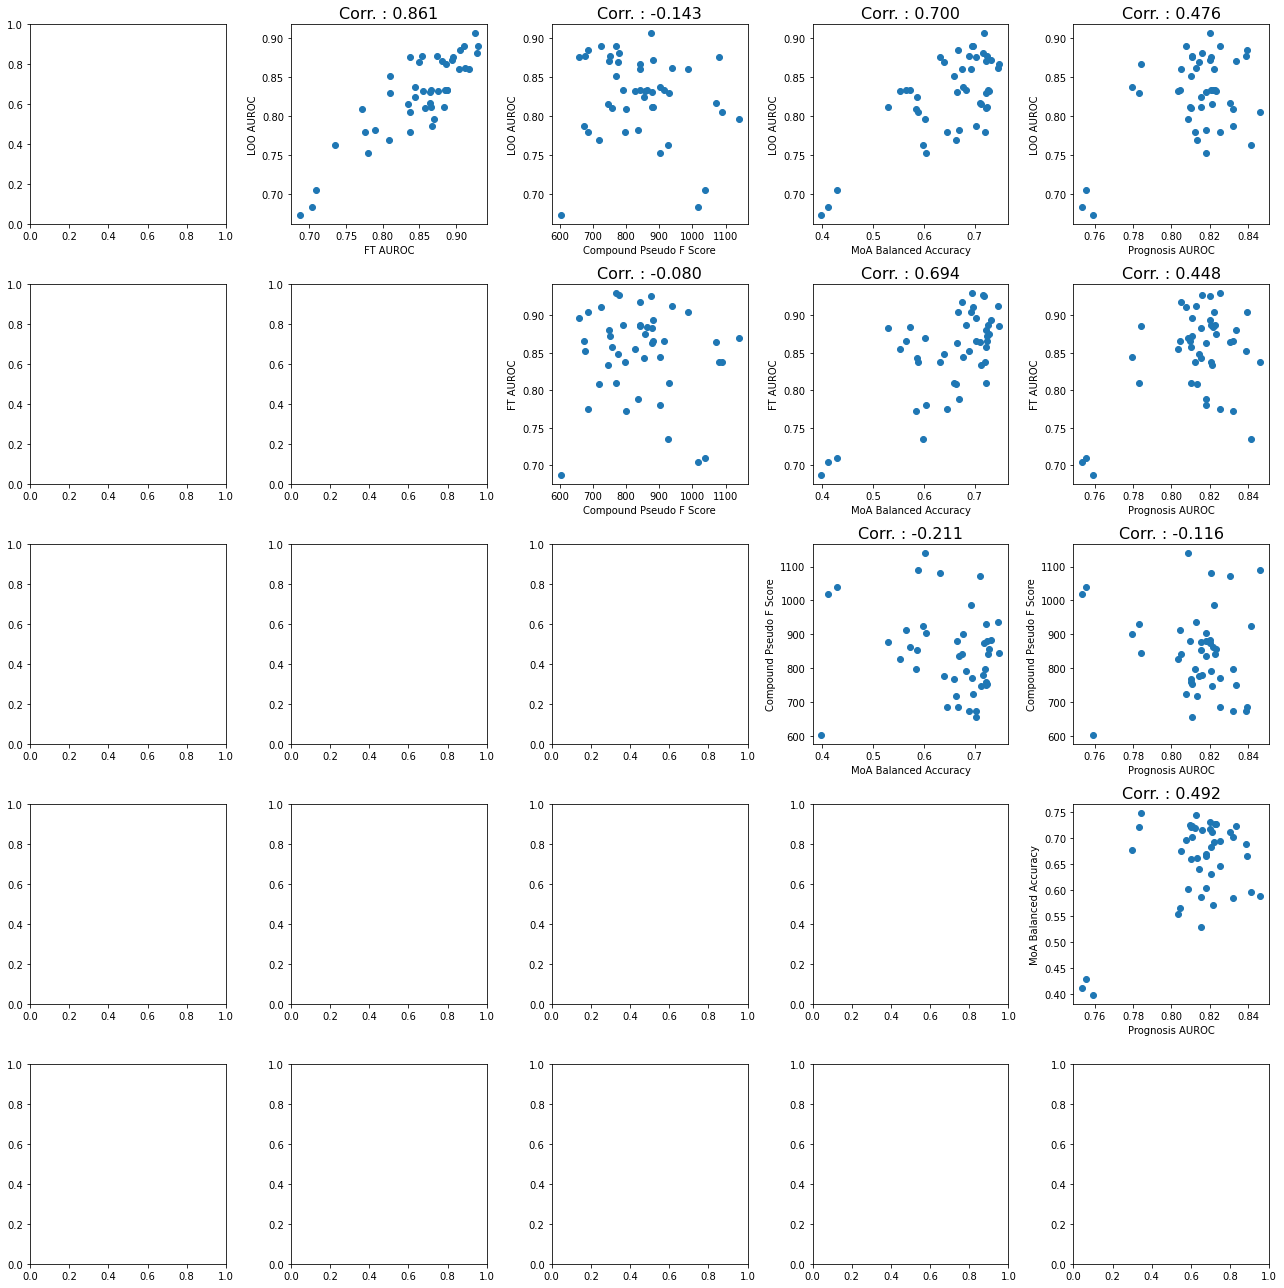

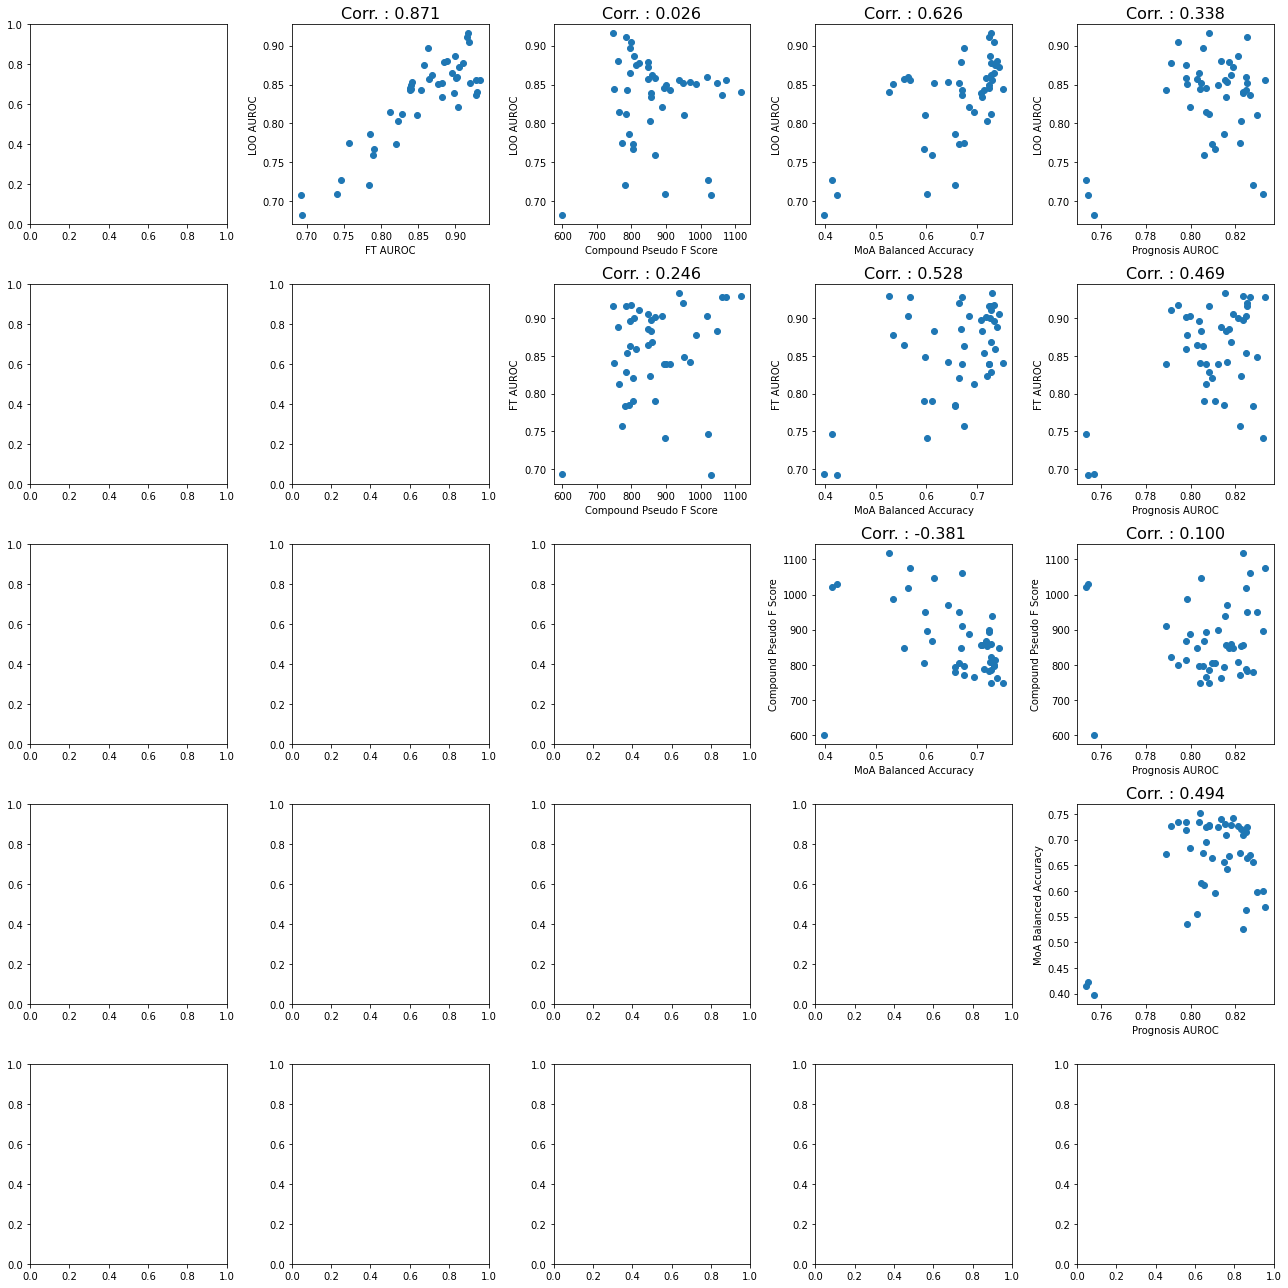

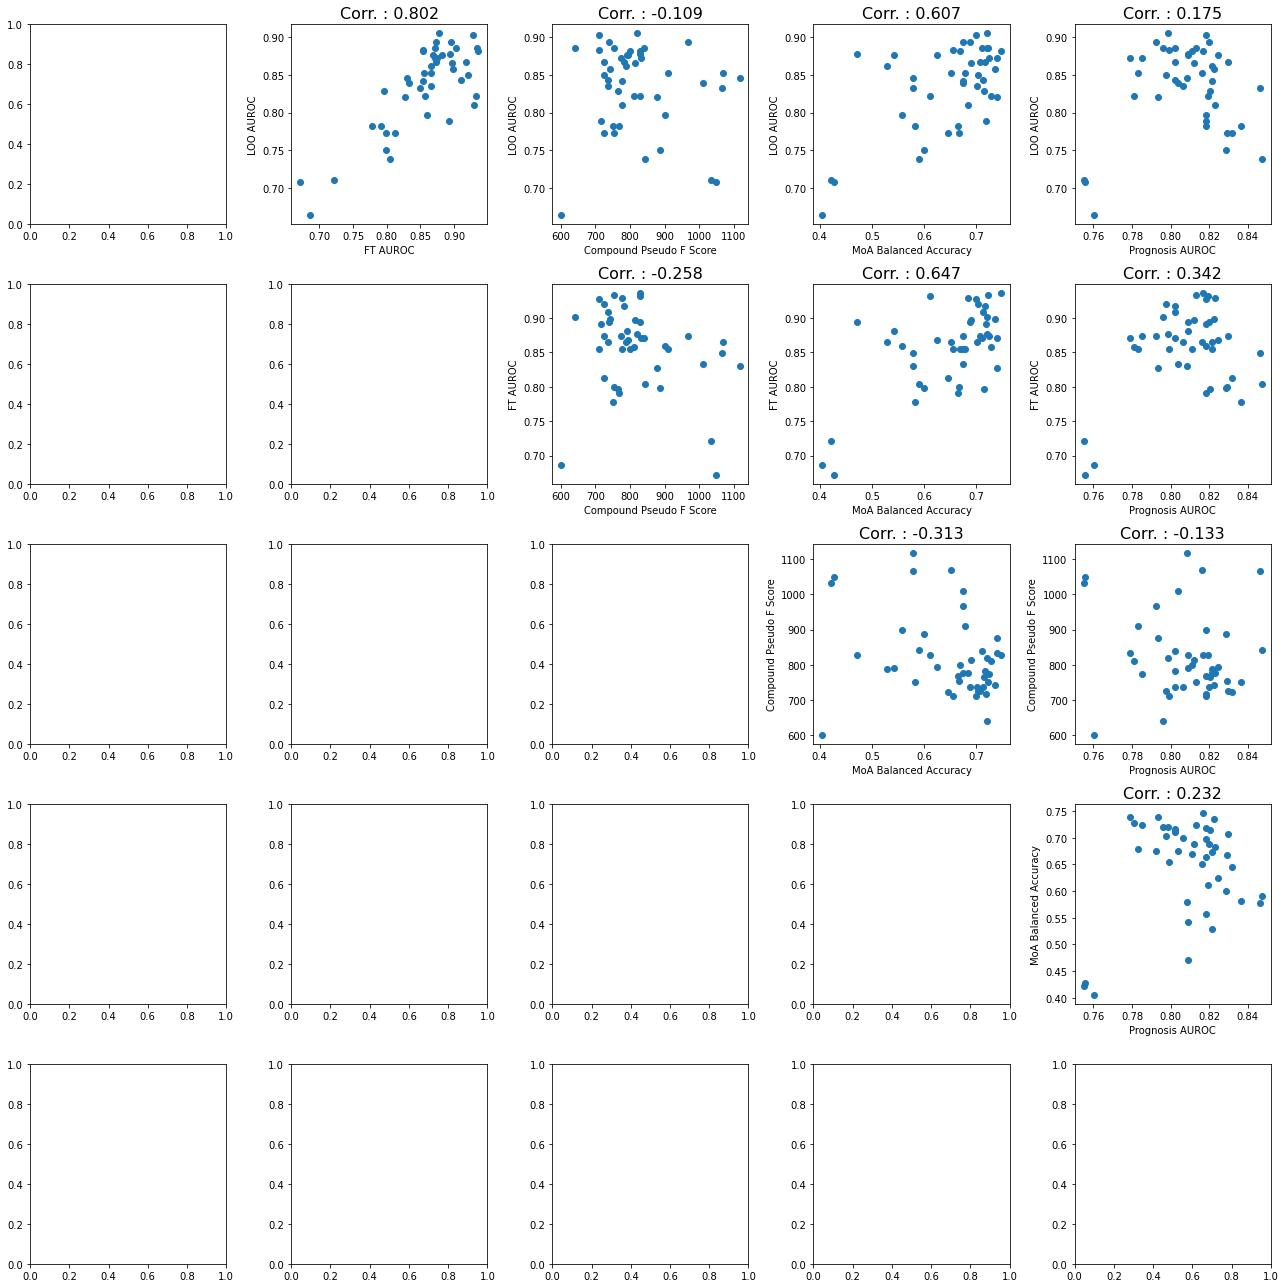

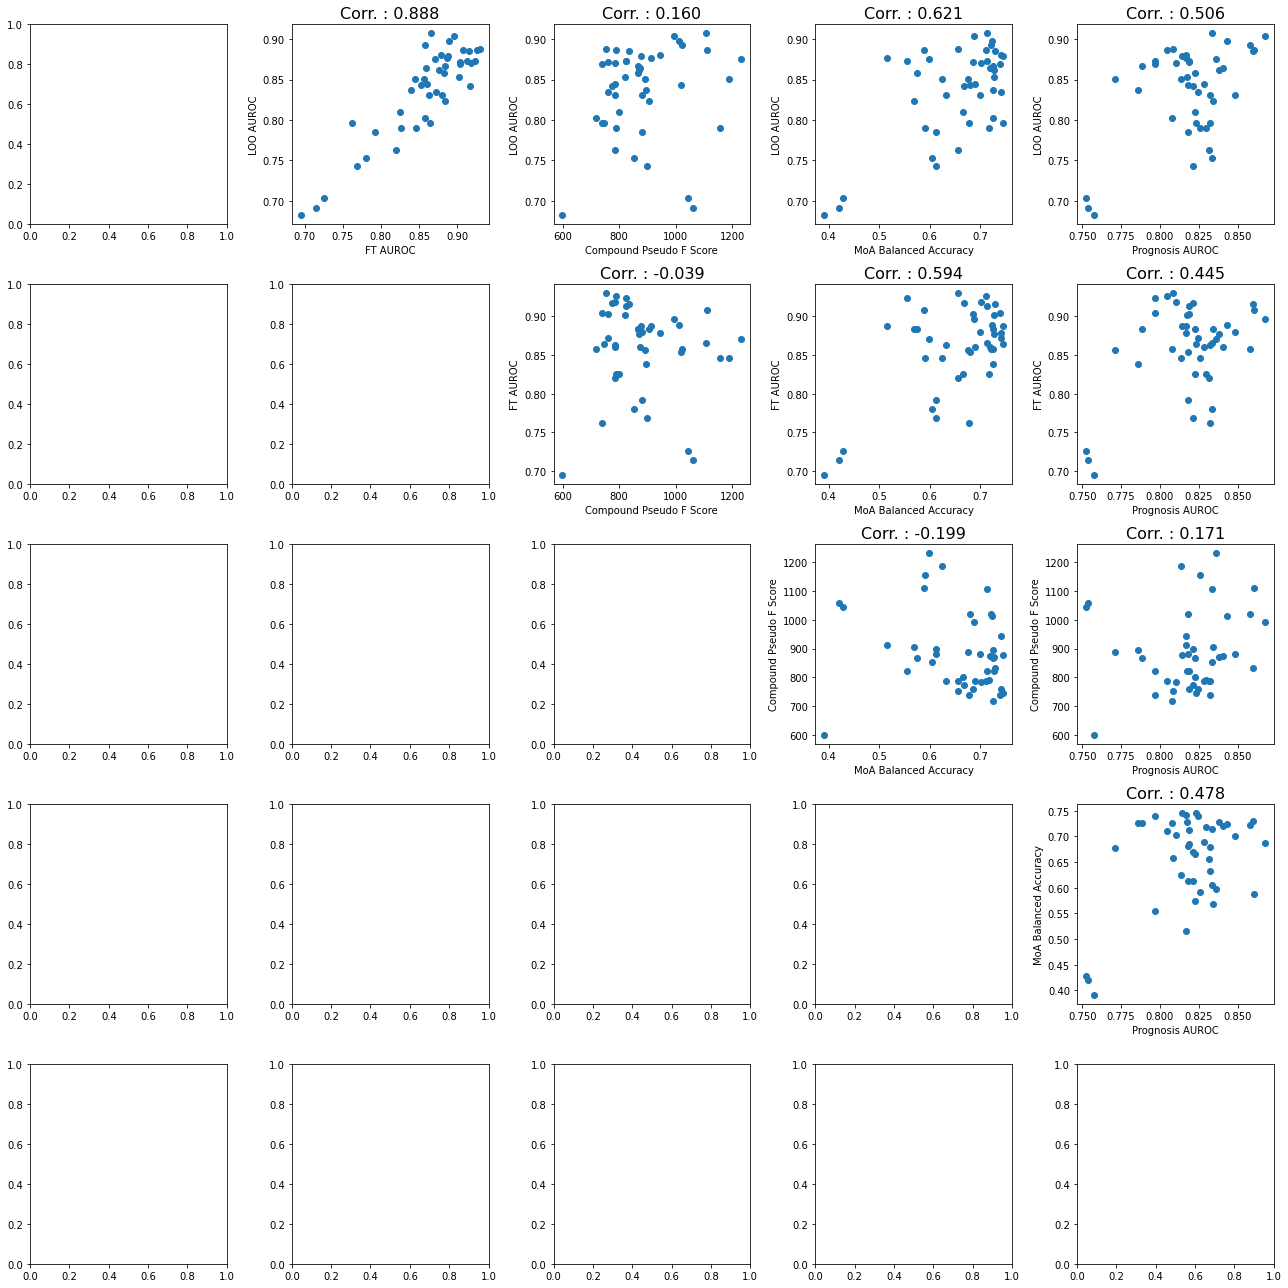

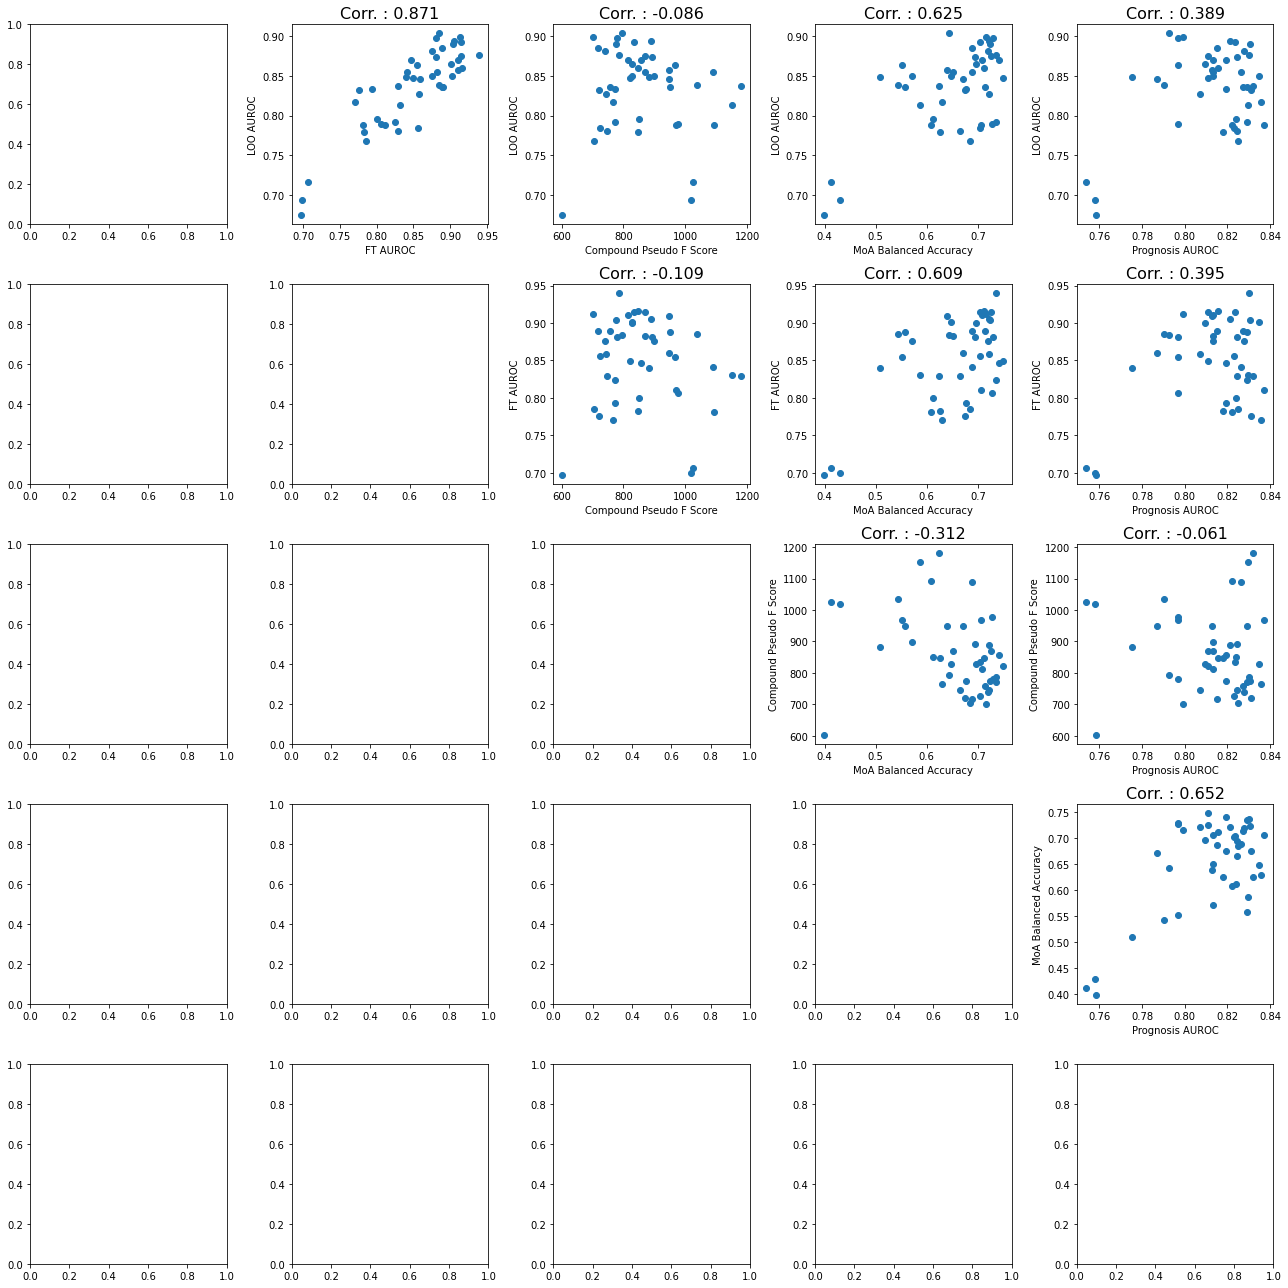

In [9]:
for seed in range(5):
    loo = pd.read_csv(f"../../outputs/results/230308finding_type_validation_loo_seed{123+seed}_epoch5.csv")
    ft = pd.read_csv(f"../../outputs/results/230308finding_type_validation_seed{123+seed}_epoch5.csv")
    com = pd.read_csv(f"../../outputs/results/230413TGGATEs_Fscore_seed{seed+123}.csv")
    moa = pd.read_csv(f"../../outputs/results/23310compound_validation_macro_{seed+123}.csv")
    prog = pd.read_csv(f"../../outputs/230311prognosis_result_{seed+123}.csv")

    x1 = loo.groupby(by=["model", "layer"]).mean()["AUROC"]
    x2 = ft.groupby(by=["model", "layer"]).mean()["AUROC"]
    x3 = com.groupby(by=["model", "layer"]).mean()["Pseudo F Score (Compound)"]
    x4 = moa.groupby(by=["model", "layer"]).mean()["Balanced Accuracy"][:-1]
    x5 = prog.groupby(by=["model", "layer"]).mean()["AUROC"][:-1]

    import numpy as np
    labels = ["LOO AUROC", "FT AUROC", "Compound Pseudo F Score", "MoA Balanced Accuracy", "Prognosis AUROC"]
    x = [x1,x2,x3,x4,x5]
    for i in range(5):
        x[i] = convert(x[i][:90])
    fig, axes = plt.subplots(5,5, figsize=(18,18))
    for i in range(5):
        for j in range(i+1,5):
            ax = axes[i,j]
            ax.scatter(x[j],x[i])
            ax.set_xlabel(labels[j])
            ax.set_ylabel(labels[i])
            ax.set_title(f"Corr. : {np.corrcoef(x[i], x[j])[0,1]:.3f}", fontsize=16)

    fig.tight_layout()
    plt.savefig(f"../../outputs/230608corr_seed{seed+123}.png", bbox_inches="tight", dpi=300)
    plt.show()
    #plt.savefig("../../outputs/results/correlations.png", bbox_inches="tight")

In [4]:
x = [0]*5
for seed in range(5):
    loo = pd.read_csv(f"../../outputs/results/230308finding_type_validation_loo_seed{123+seed}_epoch5.csv")
    ft = pd.read_csv(f"../../outputs/results/230308finding_type_validation_seed{123+seed}_epoch5.csv")
    com = pd.read_csv(f"../../outputs/results/230413TGGATEs_Fscore_seed{seed+123}.csv")
    moa = pd.read_csv(f"../../outputs/results/23310compound_validation_macro_{seed+123}.csv")
    prog = pd.read_csv(f"../../outputs/230311prognosis_result_{seed+123}.csv")

    _x1 = loo.groupby(by=["model", "layer"]).mean()["AUROC"]
    _x2 = ft.groupby(by=["model", "layer"]).mean()["AUROC"]
    _x3 = com.groupby(by=["model", "layer"]).mean()["Pseudo F Score (Compound)"]
    _x4 = moa.groupby(by=["model", "layer"]).mean()["Balanced Accuracy"][:-1]
    _x5 = prog.groupby(by=["model", "layer"]).mean()["AUROC"][:-1]
    x[0] += _x1
    x[1] += _x2
    x[2] += _x3
    x[3] += _x4
    x[4] += _x5
for i in range(5):
    x[i] /= 5
labels = ["LOO AUROC", "FT AUROC", "Compound Pseudo F Score", "MoA Balanced Accuracy", "Prognosis AUROC"]

for i in range(5):
    x[i] = convert(x[i][:90])
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i in range(5):
    for j in range(i+1,5):
        ax = axes[i,j]
        ax.scatter(x[j],x[i])
        ax.set_xlabel(labels[j])
        ax.set_ylabel(labels[i])
        ax.set_title(f"Corr. : {np.corrcoef(x[i], x[j])[0,1]:.3f}", fontsize=16)

fig.tight_layout()
#plt.savefig("../../outputs/230608corr_mean.png", bbox_inches="tight", dpi=300)
plt.show()


NameError: name 'convert' is not defined

In [142]:
x[i][:90]

model    layer  
Block 1  Block 1    0.684018
         Block 2    0.762721
         Block 3    0.769807
         Block 4    0.787734
         Block 5    0.875771
                      ...   
Head     Block 5    0.830952
         Block 6    0.841647
         Block 7    0.803383
         Head       0.836952
         Stem       0.709428
Name: AUROC, Length: 90, dtype: float64

model    layer  
Block 1  Block 1    0.716158
         Block 2    0.778967
         Block 3    0.831860
         Block 4    0.835890
         Block 5    0.860496
         Block 6    0.870737
         Block 7    0.858069
         Head       0.839041
Block 2  Block 2    0.795067
         Block 3    0.780764
         Block 4    0.784151
         Block 5    0.884704
         Block 6    0.864997
         Block 7    0.854549
         Head       0.849355
Block 3  Block 3    0.834138
         Block 4    0.792001
         Block 5    0.889868
         Block 6    0.876236
         Block 7    0.850303
         Head       0.835738
Block 4  Block 4    0.827118
         Block 5    0.898137
         Block 6    0.899452
         Block 7    0.903556
         Head       0.864264
Block 5  Block 5    0.874731
         Block 6    0.847114
         Block 7    0.787901
         Head       0.788402
Block 6  Block 6    0.870600
         Block 7    0.855341
         Head       0.812724
Block 7  Block 7    0.7899

In [194]:
x = [[] for i in range(5)]
for seed in range(5):
    loo = pd.read_csv(f"../../outputs/results/230308finding_type_validation_loo_seed{123+seed}_epoch5.csv")
    ft = pd.read_csv(f"../../outputs/results/230308finding_type_validation_seed{123+seed}_epoch5.csv")
    com = pd.read_csv(f"../../outputs/results/230413TGGATEs_Fscore_seed{seed+123}.csv")
    moa = pd.read_csv(f"../../outputs/results/23310compound_validation_macro_{seed+123}.csv")
    prog = pd.read_csv(f"../../outputs/230311prognosis_result_{seed+123}.csv")

    _x1 = loo.groupby(by=["model", "layer"]).mean()["AUROC"]
    _x2 = ft.groupby(by=["model", "layer"]).mean()["AUROC"]
    _x3 = com.groupby(by=["model", "layer"]).mean()["Pseudo F Score (Compound)"]
    _x4 = moa.groupby(by=["model", "layer"]).mean()["Balanced Accuracy"][:-1]
    _x5 = prog.groupby(by=["model", "layer"]).mean()["AUROC"][:-1]
    x[0].append(_x1)
    x[1].append(_x2)
    x[2].append(_x3)
    x[3].append(_x4)
    x[4].append(_x5)


In [195]:
for i in range(5):
    for j in range(5):
        x[i][j] = pd.DataFrame(x[i][j])
        x[i][j]["seed"] = 123+j
    x[i] = pd.concat(x[i]).groupby(by=["model", "layer"]).median()

In [196]:
for i in range(5):
    x[i] = convert(x[i][:90])
    del x[i]["seed"]

In [197]:
x[i]

AUROC
model   layer            
Block 1 Block 1  0.753597
        Block 2  0.833450
        Block 3  0.829339
        Block 4  0.827087
        Block 5  0.813741
        Block 6  0.808057
        Block 7  0.812773
        Head     0.802673
Block 2 Block 2  0.821236
        Block 3  0.818297
        Block 4  0.820277
        Block 5  0.809572
        Block 6  0.815279
        Block 7  0.818137
        Head     0.815389
Block 3 Block 3  0.819253
        Block 4  0.821276
        Block 5  0.817051
        Block 6  0.818317
        Block 7  0.825009
        Head     0.829207
Block 4 Block 4  0.807357
        Block 5  0.816162
        Block 6  0.818323
        Block 7  0.810953
        Head     0.818248
Block 5 Block 5  0.788644
        Block 6  0.810973
        Block 7  0.822369
        Head     0.808557
Block 6 Block 6  0.814065
        Block 7  0.823193
        Head     0.829829
Block 7 Block 7  0.793711
        Head     0.816435
Full    Block 1  0.755312
        Block 2  0.831902
        Block 3  0.827763
        Block 4  0.827679
        Block 5  0.823284
        Block 6  0.820992
        Block 7  0.823394
        Head     0.809144
        Stem     0.758418
Head    Head     0.783146

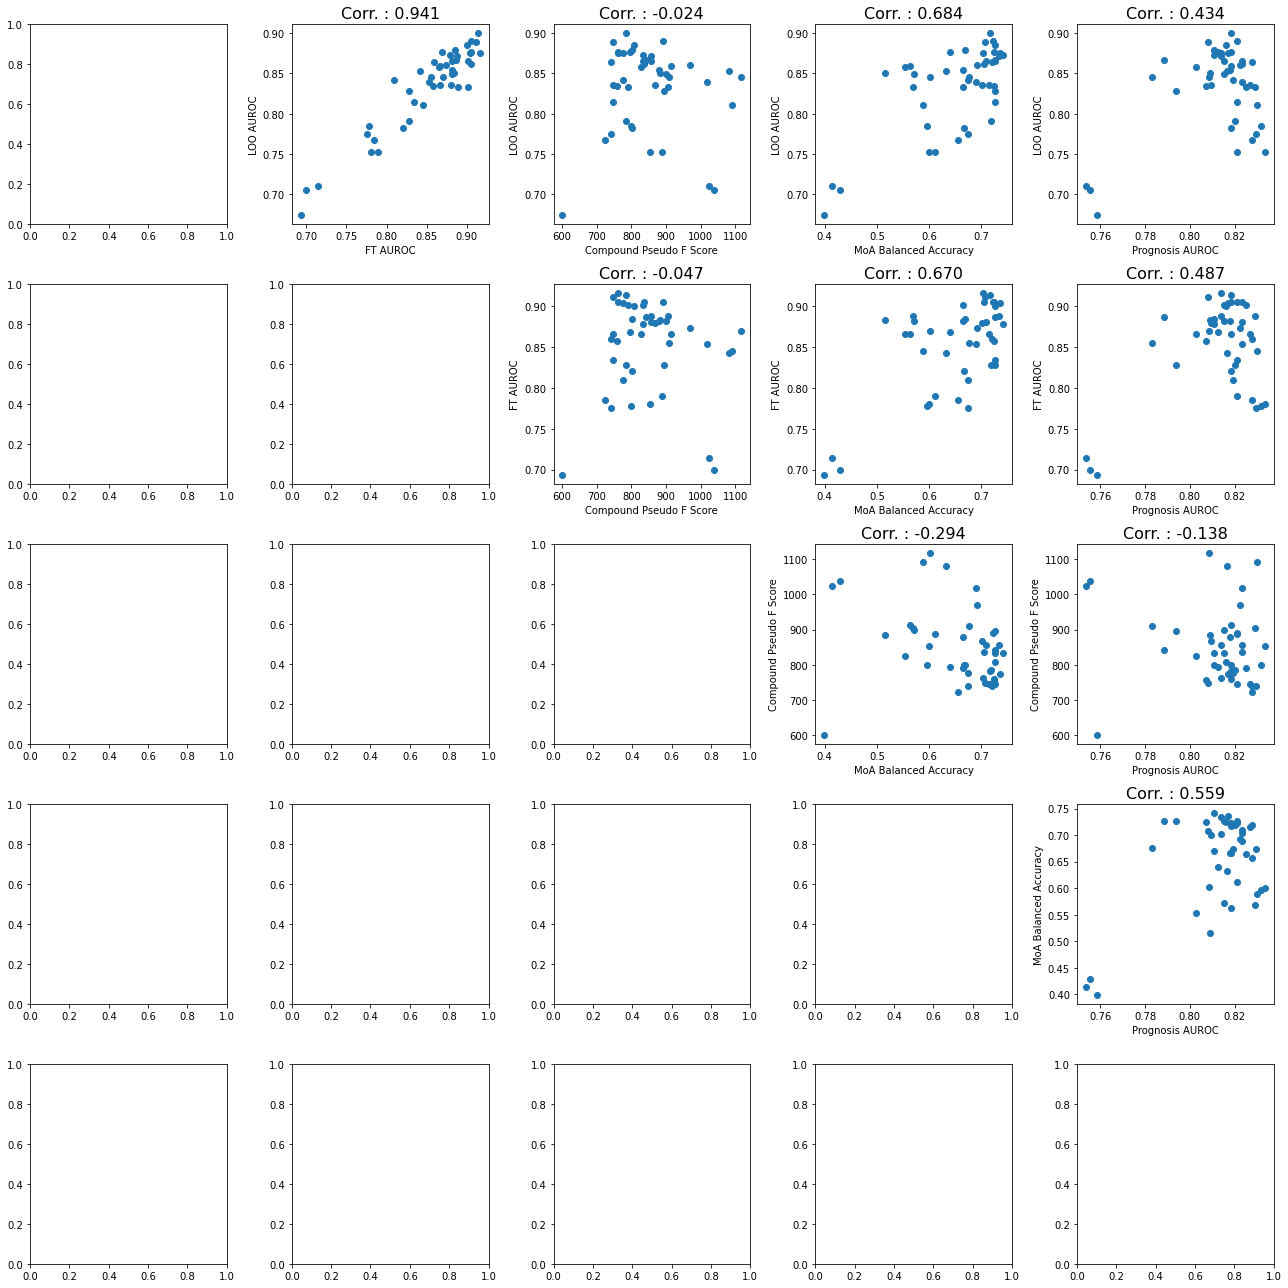

In [198]:
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i in range(5):
    for j in range(i+1,5):
        ax = axes[i,j]
        ax.scatter(x[j],x[i])
        ax.set_xlabel(labels[j])
        ax.set_ylabel(labels[i])
        ax.set_title(f"Corr. : {np.corrcoef(x[i].to_numpy().reshape(-1), x[j].to_numpy().reshape(-1))[0,1]:.3f}", fontsize=16)

fig.tight_layout()
plt.savefig("../../outputs/230608corr_median.png", bbox_inches="tight", dpi=300)

plt.show()


In [182]:
x[1]

AUROC   seed
model   layer                   
Block 1 Block 1  0.714729  125.0
        Block 2  0.780820  125.0
        Block 3  0.775814  125.0
        Block 4  0.866588  125.0
        Block 5  0.915882  125.0
        Block 6  0.911144  125.0
        Block 7  0.868853  125.0
        Head     0.865790  125.0
Block 2 Block 2  0.789569  125.0
        Block 3  0.820521  125.0
        Block 4  0.828016  125.0
        Block 5  0.879895  125.0
        Block 6  0.901989  125.0
        Block 7  0.882115  125.0
        Head     0.881684  125.0
Block 3 Block 3  0.809733  125.0
        Block 4  0.834542  125.0
        Block 5  0.903868  125.0
        Block 6  0.905713  125.0
        Block 7  0.901752  125.0
        Head     0.888608  125.0
Block 4 Block 4  0.858118  125.0
        Block 5  0.900017  125.0
        Block 6  0.913601  125.0
        Block 7  0.885034  125.0
        Head     0.866132  125.0
Block 5 Block 5  0.886317  125.0
        Block 6  0.878775  125.0
        Block 7  0.873510  125.0
        Head     0.870079  125.0
Block 6 Block 6  0.887702  125.0
        Block 7  0.853340  125.0
        Head     0.845736  125.0
Block 7 Block 7  0.827558  125.0
        Head     0.842318  125.0
Full    Block 1  0.699224  125.0
        Block 2  0.778054  125.0
        Block 3  0.784997  125.0
        Block 4  0.859677  125.0
        Block 5  0.904670  125.0
        Block 6  0.904701  125.0
        Block 7  0.880964  125.0
        Head     0.883688  125.0
        Stem     0.693194  125.0
Head    Head     0.855249  125.0